# Walmart Recruiting - Store Sales Forecasting 

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

## Getting data

In [2]:
stores_df = pd.read_csv('stores.csv')
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
features_df = pd.read_csv('features.csv')
submission_df = pd.read_csv('sampleSubmission.csv')

## Converting the date columns

In [3]:
train_df['Date'] = pd.to_datetime(train_df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])
features_df['Date'] = pd.to_datetime(features_df['Date'])

## Data description

In [4]:
stores_df.head()

Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

In [5]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [6]:
stores_df.describe()

Store           Size
count  45.000000      45.000000
mean   23.000000  130287.600000
std    13.133926   63825.271991
min     1.000000   34875.000000
25%    12.000000   70713.000000
50%    23.000000  126512.000000
75%    34.000000  202307.000000
max    45.000000  219622.000000

In [7]:
train_df.head()

Store  Dept       Date  Weekly_Sales  IsHoliday
0      1     1 2010-02-05      24924.50      False
1      1     1 2010-02-12      46039.49       True
2      1     1 2010-02-19      41595.55      False
3      1     1 2010-02-26      19403.54      False
4      1     1 2010-03-05      21827.90      False

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


In [9]:
train_df.describe()

Store           Dept                           Date  \
count  421570.000000  421570.000000                         421570   
mean       22.200546      44.260317  2011-06-18 08:30:31.963375104   
min         1.000000       1.000000            2010-02-05 00:00:00   
25%        11.000000      18.000000            2010-10-08 00:00:00   
50%        22.000000      37.000000            2011-06-17 00:00:00   
75%        33.000000      74.000000            2012-02-24 00:00:00   
max        45.000000      99.000000            2012-10-26 00:00:00   
std        12.785297      30.492054                            NaN   

        Weekly_Sales  
count  421570.000000  
mean    15981.258123  
min     -4988.940000  
25%      2079.650000  
50%      7612.030000  
75%     20205.852500  
max    693099.360000  
std     22711.183519

In [10]:
features_df.head()

Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0      1 2010-02-05        42.31       2.572        NaN        NaN        NaN   
1      1 2010-02-12        38.51       2.548        NaN        NaN        NaN   
2      1 2010-02-19        39.93       2.514        NaN        NaN        NaN   
3      1 2010-02-26        46.63       2.561        NaN        NaN        NaN   
4      1 2010-03-05        46.50       2.625        NaN        NaN        NaN   

   MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN  211.350143         8.106      False

In [11]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 712.0 KB


In [12]:
features_df.describe()

Store                 Date  Temperature   Fuel_Price  \
count  8190.000000                 8190  8190.000000  8190.000000   
mean     23.000000  2011-10-31 12:00:00    59.356198     3.405992   
min       1.000000  2010-02-05 00:00:00    -7.290000     2.472000   
25%      12.000000  2010-12-17 00:00:00    45.902500     3.041000   
50%      23.000000  2011-10-31 12:00:00    60.710000     3.513000   
75%      34.000000  2012-09-14 00:00:00    73.880000     3.743000   
max      45.000000  2013-07-26 00:00:00   101.950000     4.468000   
std      12.987966                  NaN    18.678607     0.431337   

           MarkDown1      MarkDown2      MarkDown3     MarkDown4  \
count    4032.000000    2921.000000    3613.000000   3464.000000   
mean     7032.371786    3384.176594    1760.100180   3292.935886   
min     -2781.450000    -265.760000    -179.260000      0.220000   
25%      1577.532500      68.880000       6.600000    304.687500   
50%      4743.580000     364.570000      36.260000   1176.425000   
75%      8923.310000    2153.350000     163.150000   3310.007500   
max    103184.980000  104519.540000  149483.310000  67474.850000   
std      9262.747448    8793.583016   11276.462208   6792.329861   

           MarkDown5          CPI  Unemployment  
count    4050.000000  7605.000000   7605.000000  
mean     4132.216422   172.460809      7.826821  
min      -185.170000   126.064000      3.684000  
25%      1440.827500   132.364839      6.634000  
50%      2727.135000   182.764003      7.806000  
75%      4832.555000   213.932412      8.567000  
max    771448.100000   228.976456     14.313000  
std     13086.690278    39.738346      1.877259

# Stores data analysis

### Color palette for each store type

In [13]:
color_palette = {'A': '#3399ff', 'B': '#ff5050', 'C': '#2eb82e'}

## Sizes of the 45 stores based on their type

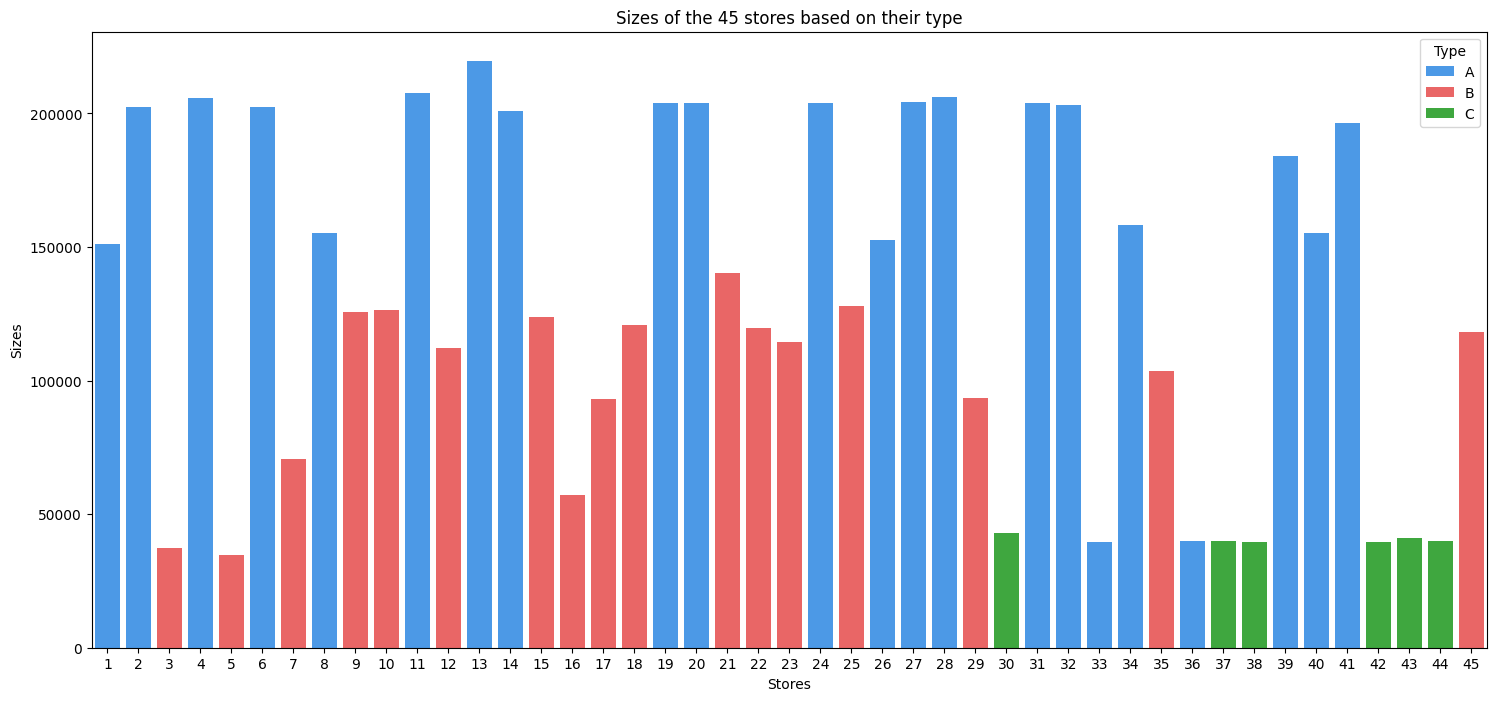

In [14]:
fig, ax = plt.subplots(figsize=(18, 8))
plt.xticks(rotation=0)
sns.barplot(x='Store', y='Size', hue='Type', data=stores_df, ax=ax, palette=color_palette)
plt.title('Sizes of the 45 stores based on their type')
plt.xlabel('Stores')
plt.ylabel('Sizes')
plt.show()

### Observations
In the graph above, we discovered that type A stores are the largest and type C stores are the smallest, with type B stores falling in the middle.

## Number of stores in each type

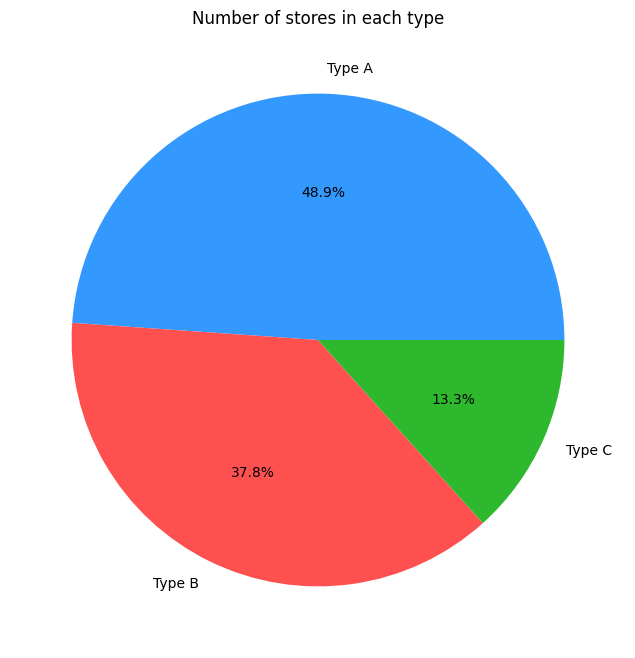

In [66]:
stores = ['Type A','Type B','Type C']

data = stores_df['Type'].value_counts()

colors = {'Type A': '#3399ff', 'Type B': '#ff5050', 'Type C': '#2eb82e'}

# Creating plot
fig, ax = plt.subplots(figsize=(18, 8))
plt.pie(data, labels = stores, autopct='%1.1f%%', colors=[colors[store] for store in stores])
ax.set_title('Number of stores in each type')
# show plot
plt.show()

### Observations
Type A stores has the highest number of stores compared to type B and type C stores, with type C having the least number of stores

# Weekly sales analysis

### Merging the stores and train datasets

In [16]:
merged_train_df = train_df.merge(stores_df, how='inner', on='Store')
merged_train_df.head()

Store  Dept       Date  Weekly_Sales  IsHoliday Type    Size
0      1     1 2010-02-05      24924.50      False    A  151315
1      1     1 2010-02-12      46039.49       True    A  151315
2      1     1 2010-02-19      41595.55      False    A  151315
3      1     1 2010-02-26      19403.54      False    A  151315
4      1     1 2010-03-05      21827.90      False    A  151315

In [17]:
merged_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 19.7+ MB


In [18]:
merged_train_df.describe()

Store           Dept                           Date  \
count  421570.000000  421570.000000                         421570   
mean       22.200546      44.260317  2011-06-18 08:30:31.963375104   
min         1.000000       1.000000            2010-02-05 00:00:00   
25%        11.000000      18.000000            2010-10-08 00:00:00   
50%        22.000000      37.000000            2011-06-17 00:00:00   
75%        33.000000      74.000000            2012-02-24 00:00:00   
max        45.000000      99.000000            2012-10-26 00:00:00   
std        12.785297      30.492054                            NaN   

        Weekly_Sales           Size  
count  421570.000000  421570.000000  
mean    15981.258123  136727.915739  
min     -4988.940000   34875.000000  
25%      2079.650000   93638.000000  
50%      7612.030000  140167.000000  
75%     20205.852500  202505.000000  
max    693099.360000  219622.000000  
std     22711.183519   60980.583328

## Weekly Sales from 2010 to 2012

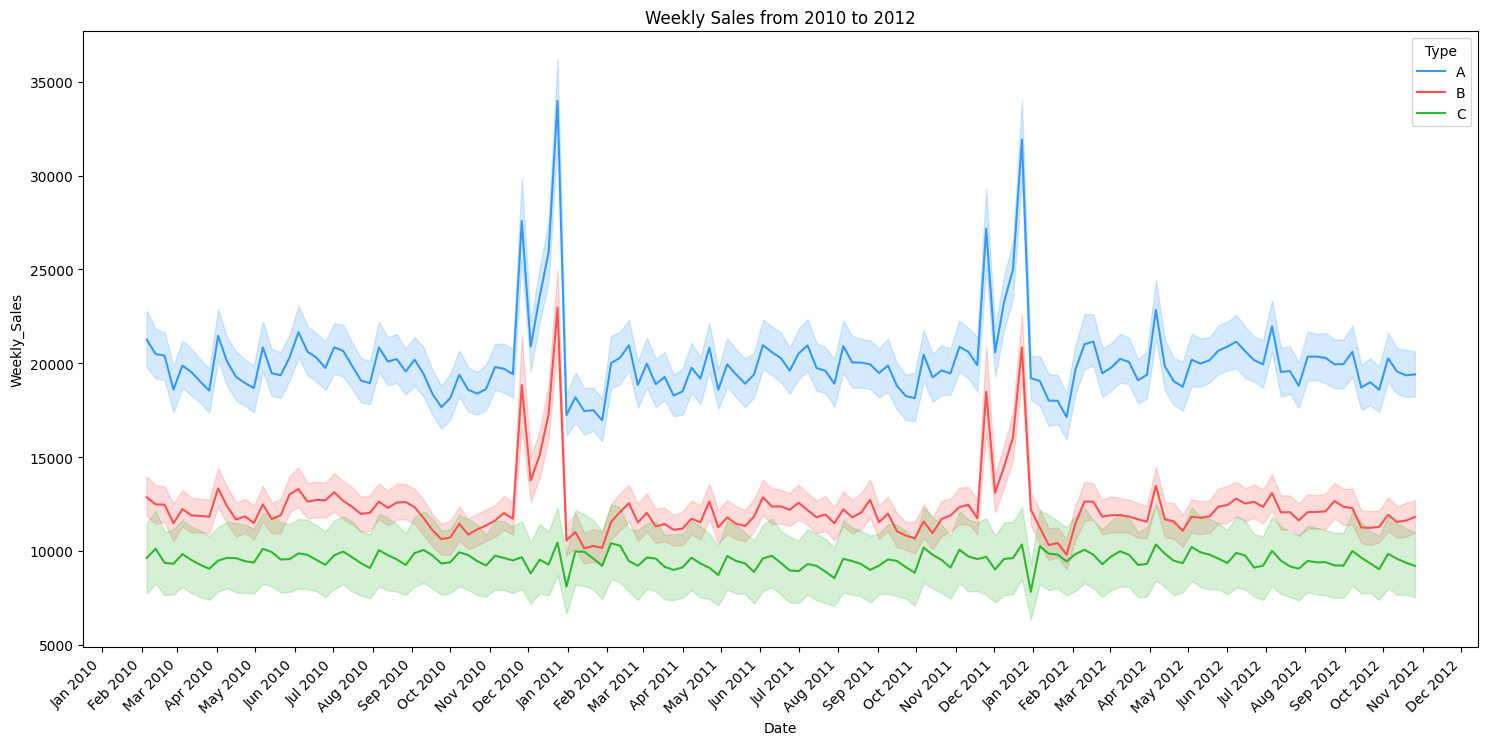

In [19]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(18, 8))
sns.lineplot(x=merged_train_df['Date'], y=merged_train_df['Weekly_Sales'], hue='Type', data=merged_train_df, palette=color_palette)

plt.title('Weekly Sales from 2010 to 2012')

plt.xticks(rotation=45, ha='right')

# Set x-axis major locator to monthly frequency
ax.xaxis.set_major_locator(mdates.MonthLocator())

# Format the x-axis tick labels as Month-Year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.show()

## Weekly Sales from 2010 to 2012 in every type of store

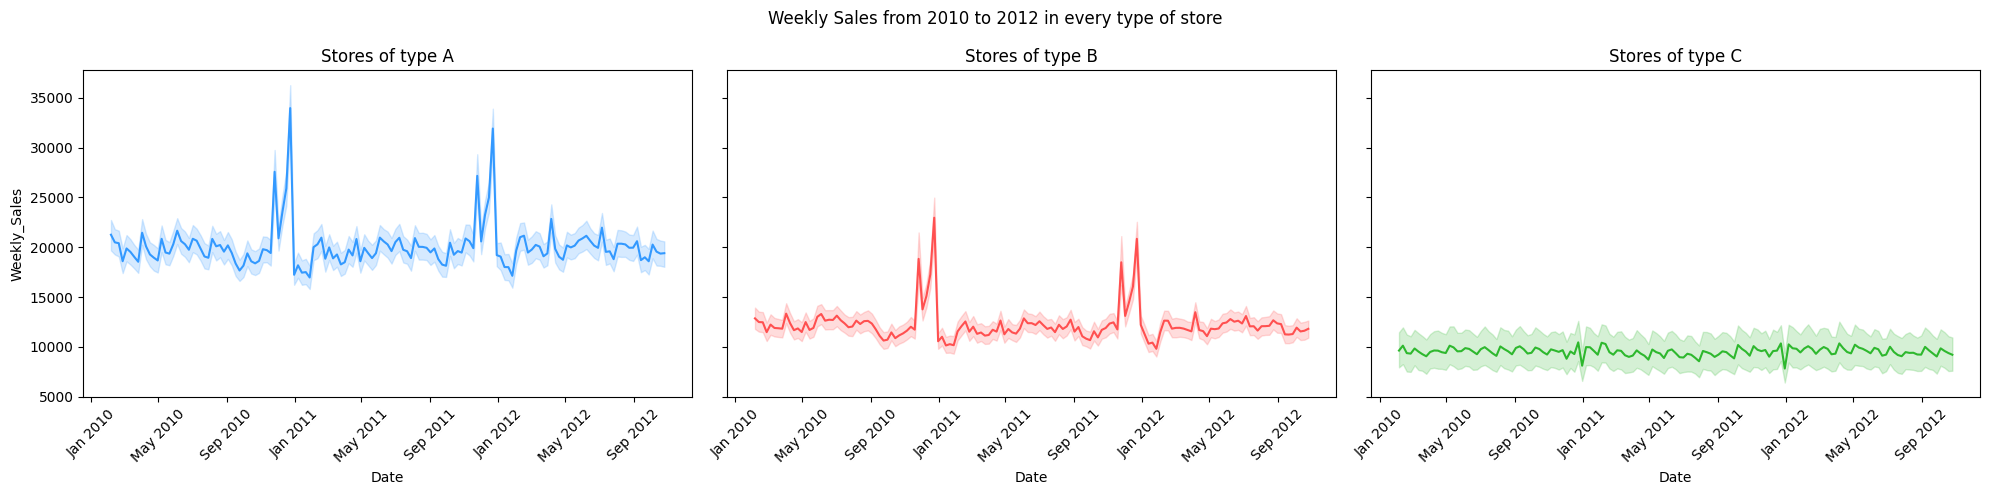

In [20]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(20, 5))
fig.suptitle('Weekly Sales from 2010 to 2012 in every type of store')

# Set date formatter for x-axis
date_format = mdates.DateFormatter('%b %Y')

sns.lineplot(ax=ax[0], x='Date', y='Weekly_Sales', data=merged_train_df[merged_train_df['Type'] == 'A'], color=color_palette['A'])
ax[0].set_title('Stores of type A')
ax[0].xaxis.set_major_formatter(date_format)
ax[0].tick_params(axis='x', rotation=45)

sns.lineplot(ax=ax[1], x='Date', y='Weekly_Sales', data=merged_train_df[merged_train_df['Type'] == 'B'], color=color_palette['B'])
ax[1].set_title('Stores of type B')
ax[1].xaxis.set_major_formatter(date_format)
ax[1].tick_params(axis='x', rotation=45)

sns.lineplot(ax=ax[2], x='Date', y='Weekly_Sales', data=merged_train_df[merged_train_df['Type'] == 'C'], color=color_palette['C'])
ax[2].set_title('Stores of type C')
ax[2].xaxis.set_major_formatter(date_format)
ax[2].tick_params(axis='x', rotation=45)

plt.tight_layout()

## Weekly sales based during holidays

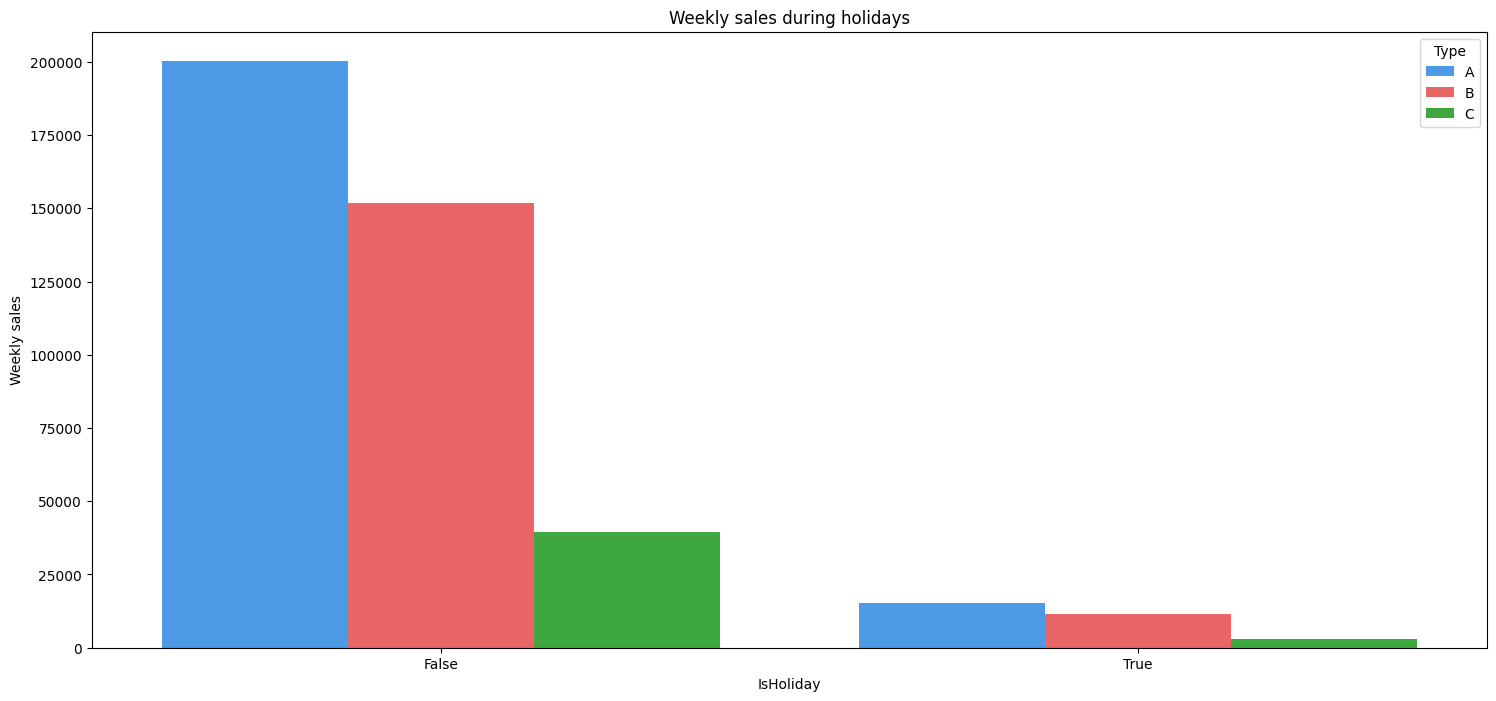

In [97]:
fig, ax = plt.subplots(figsize=(18, 8))
sns.countplot(x='IsHoliday', data=merged_train_df, hue='Type', palette=color_palette)

plt.title('Weekly sales during holidays')
plt.ylabel('Weekly sales')

plt.show()

### Observations
<ul>
    <li>Type A stores have the highest weekly sales compared to other store types. </li>
    <li>We noticed a continuous spike in weekly sales around the end or beginning of each year, coinciding with the holiday season especially Thanksgiving and Christma</li>
    <li>While type C stores experience a decline in their weekly sales around the holiday season.</li>
</ul>

## Holiday seasons dates

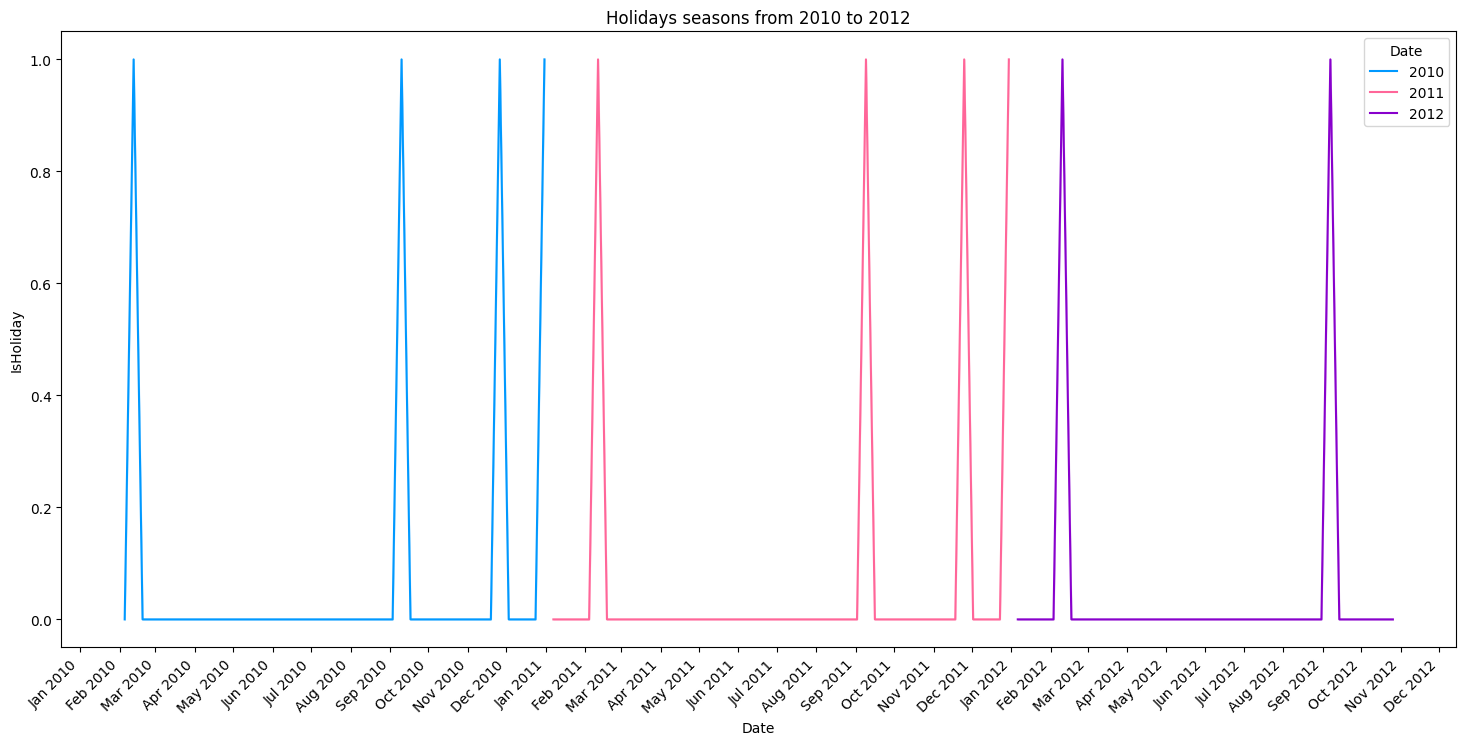

In [22]:
import matplotlib.dates as mdates

year_colors = {2010: '#0099ff', 2011: '#ff6699', 2012: '#8800cc'}

fig, ax = plt.subplots(figsize=(18, 8))
sns.lineplot(x=merged_train_df['Date'], y=merged_train_df['IsHoliday'], hue=merged_train_df['Date'].dt.year, data=merged_train_df, palette=year_colors)

plt.title('Holidays seasons from 2010 to 2012')

plt.xticks(rotation=45, ha='right')

# Set x-axis major locator to monthly frequency
ax.xaxis.set_major_locator(mdates.MonthLocator())

# Format the x-axis tick labels as Month-Year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.show()

## Weekly Sales of every store

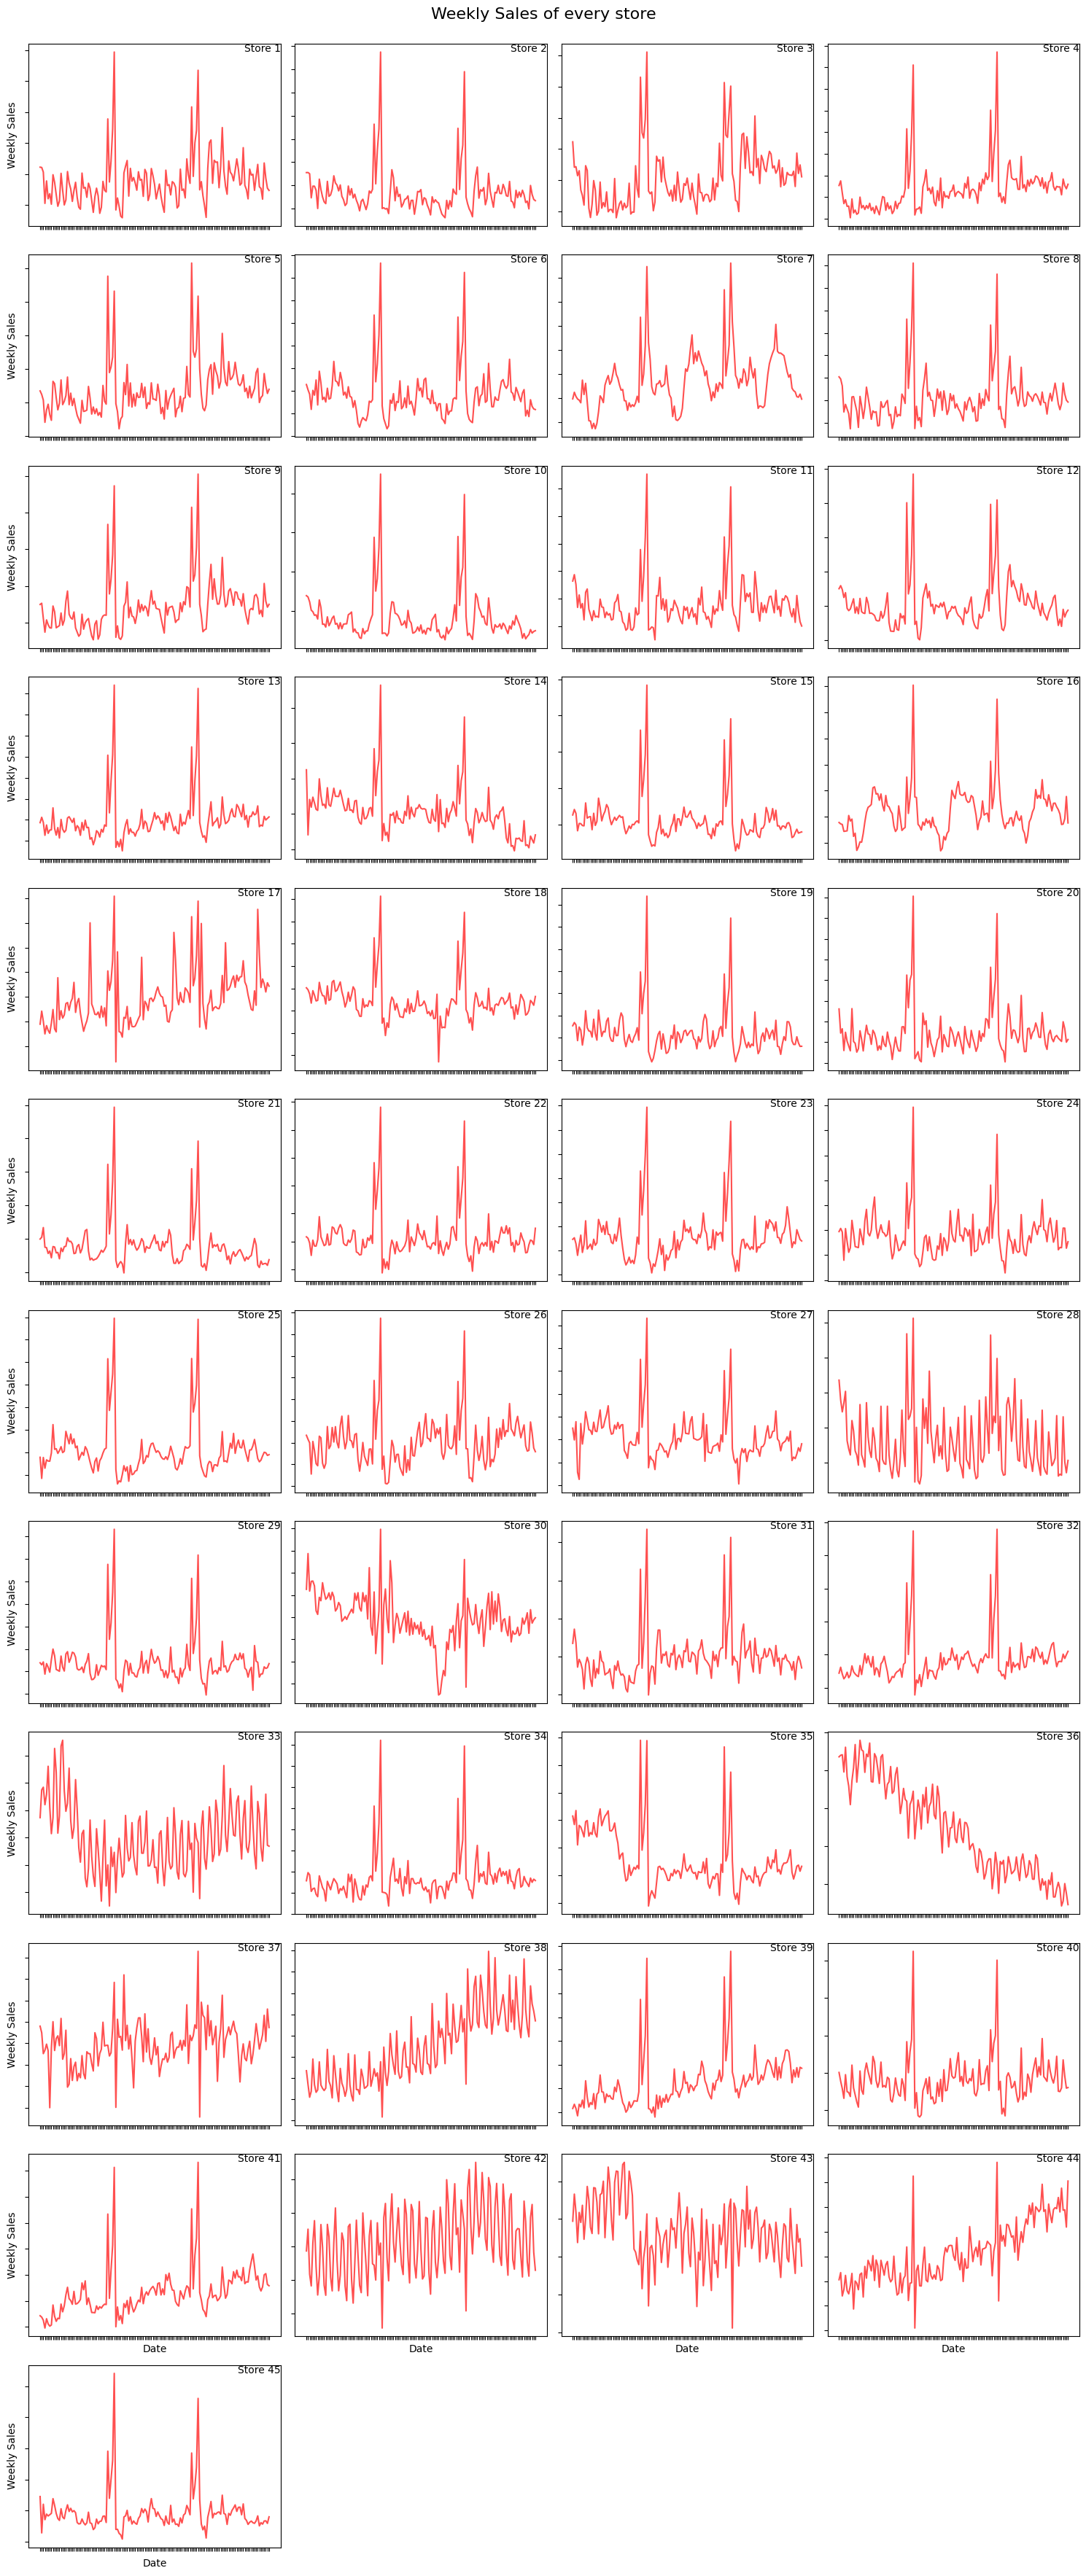

In [67]:
def weekly_graphs(dataset):
    # Group the data by week and store
    grouped_data = dataset.groupby(['Date', 'Store'])['Weekly_Sales'].sum().reset_index()

    # Get unique store numbers
    unique_stores = grouped_data['Store'].unique()
    all_weeks = dataset['Date'].unique()

    # Calculate the number of rows and columns for the subplots
    n_cols = 4
    n_rows = (len(unique_stores) + n_cols - 1) // n_cols  # Ensure at least n_cols

    # Create subplots with the specified number of rows and columns
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3 * n_rows), sharex=True)

    # Flatten the axes array if there is only one row
    axes = axes.flatten()

    # Iterate through unique stores and plot weekly sales
    for i, store in enumerate(unique_stores):
        store_data = grouped_data[grouped_data['Store'] == store]
        axes[i].plot(store_data['Date'], store_data['Weekly_Sales'], label=f'Store {store}', color='#ff5050')

        axes[i].annotate(f'Store {store}', xy=(1, 1), xycoords='axes fraction', fontsize=10, ha='right', va='top')

        axes[i].set_xticklabels([])
        axes[i].set_yticklabels([])

        if i % n_cols == 0:
            axes[i].set_ylabel('Weekly Sales')
            
        if i >= (n_rows - 2) * n_cols:
            axes[i].set_xlabel('Date')

    # Hide empty subplots
    for j in range(len(unique_stores), n_rows * n_cols):
        fig.delaxes(axes[j])

    fig.suptitle('Weekly Sales of every store', fontsize=16)

    # Adjust layout for better spacing between subplots
    plt.tight_layout(rect=[0, 0, 1, 0.98])

    plt.show()

train_df = pd.read_csv('train.csv')
weekly_graphs(train_df)


# Merging the stores dataset with the features dataset

In [24]:
merged_features_df = features_df.merge(stores_df, how='inner', on='Store')
merged_features_df.head()

Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0      1 2010-02-05        42.31       2.572        NaN        NaN        NaN   
1      1 2010-02-12        38.51       2.548        NaN        NaN        NaN   
2      1 2010-02-19        39.93       2.514        NaN        NaN        NaN   
3      1 2010-02-26        46.63       2.561        NaN        NaN        NaN   
4      1 2010-03-05        46.50       2.625        NaN        NaN        NaN   

   MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday Type    Size  
0        NaN        NaN  211.096358         8.106      False    A  151315  
1        NaN        NaN  211.242170         8.106       True    A  151315  
2        NaN        NaN  211.289143         8.106      False    A  151315  
3        NaN        NaN  211.319643         8.106      False    A  151315  
4        NaN        NaN  211.350143         8.106      False    A  151315

In [25]:
merged_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
 12  Type          8190 non-null   object        
 13  Size          8190 non-null   int64         
dtypes: bool(1), datetime64[ns](1), float64(9), int64(2), object(1)
memory usage: 839.9+ KB


In [26]:
merged_features_df.describe()

Store                 Date  Temperature   Fuel_Price  \
count  8190.000000                 8190  8190.000000  8190.000000   
mean     23.000000  2011-10-31 12:00:00    59.356198     3.405992   
min       1.000000  2010-02-05 00:00:00    -7.290000     2.472000   
25%      12.000000  2010-12-17 00:00:00    45.902500     3.041000   
50%      23.000000  2011-10-31 12:00:00    60.710000     3.513000   
75%      34.000000  2012-09-14 00:00:00    73.880000     3.743000   
max      45.000000  2013-07-26 00:00:00   101.950000     4.468000   
std      12.987966                  NaN    18.678607     0.431337   

           MarkDown1      MarkDown2      MarkDown3     MarkDown4  \
count    4032.000000    2921.000000    3613.000000   3464.000000   
mean     7032.371786    3384.176594    1760.100180   3292.935886   
min     -2781.450000    -265.760000    -179.260000      0.220000   
25%      1577.532500      68.880000       6.600000    304.687500   
50%      4743.580000     364.570000      36.260000   1176.425000   
75%      8923.310000    2153.350000     163.150000   3310.007500   
max    103184.980000  104519.540000  149483.310000  67474.850000   
std      9262.747448    8793.583016   11276.462208   6792.329861   

           MarkDown5          CPI  Unemployment           Size  
count    4050.000000  7605.000000   7605.000000    8190.000000  
mean     4132.216422   172.460809      7.826821  130287.600000  
min      -185.170000   126.064000      3.684000   34875.000000  
25%      1440.827500   132.364839      6.634000   70713.000000  
50%      2727.135000   182.764003      7.806000  126512.000000  
75%      4832.555000   213.932412      8.567000  202307.000000  
max    771448.100000   228.976456     14.313000  219622.000000  
std     13086.690278    39.738346      1.877259   63115.971429

## Fuel prices based on the store's type

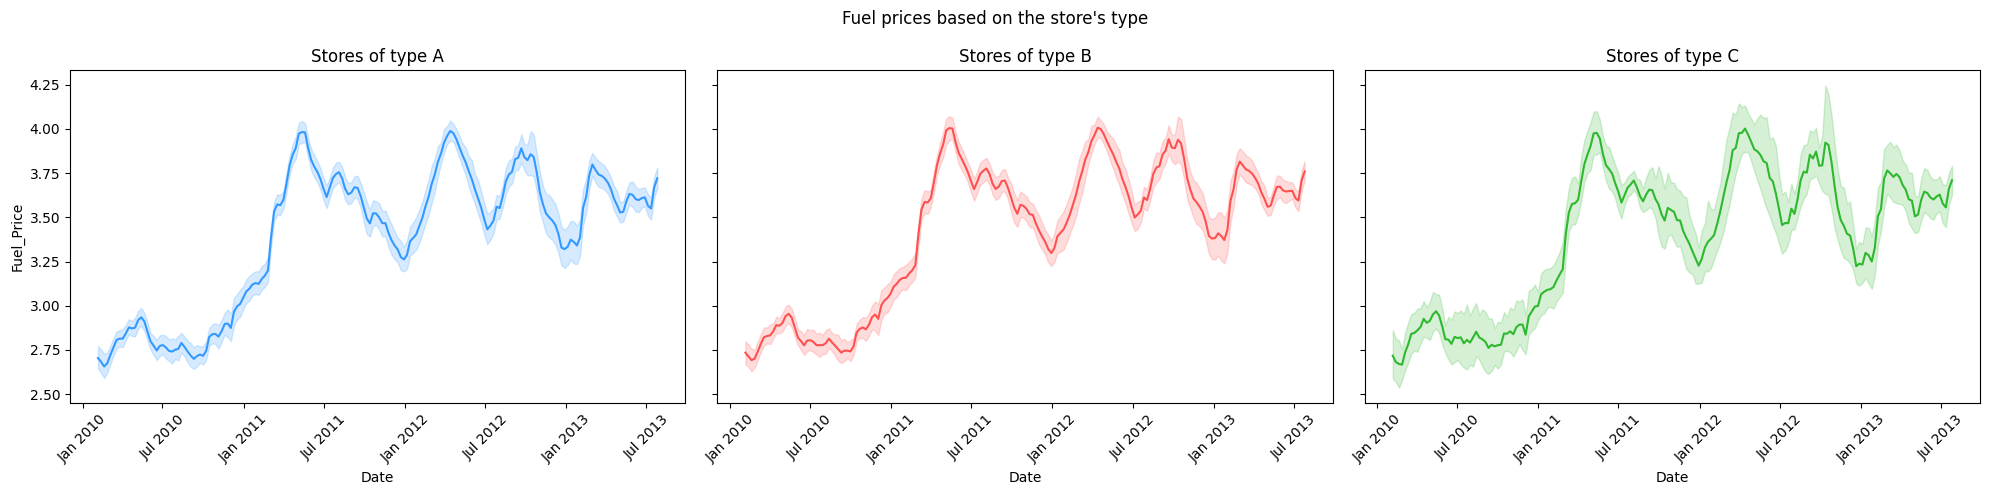

In [27]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(20, 5))
fig.suptitle('Fuel prices based on the store\'s type')

# Set date formatter for x-axis
date_format = mdates.DateFormatter('%b %Y')

sns.lineplot(ax=ax[0], x='Date', y='Fuel_Price', data=merged_features_df[merged_features_df['Type'] == 'A'], color=color_palette['A'])
ax[0].set_title('Stores of type A')
ax[0].xaxis.set_major_formatter(date_format)
ax[0].tick_params(axis='x', rotation=45)

sns.lineplot(ax=ax[1], x='Date', y='Fuel_Price', data=merged_features_df[merged_features_df['Type'] == 'B'], color=color_palette['B'])
ax[1].set_title('Stores of type B')
ax[1].xaxis.set_major_formatter(date_format)
ax[1].tick_params(axis='x', rotation=45)

sns.lineplot(ax=ax[2], x='Date', y='Fuel_Price', data=merged_features_df[merged_features_df['Type'] == 'C'], color=color_palette['C'])
ax[2].set_title('Stores of type C')
ax[2].xaxis.set_major_formatter(date_format)
ax[2].tick_params(axis='x', rotation=45)

plt.tight_layout()

## Temperatures based on the store's type

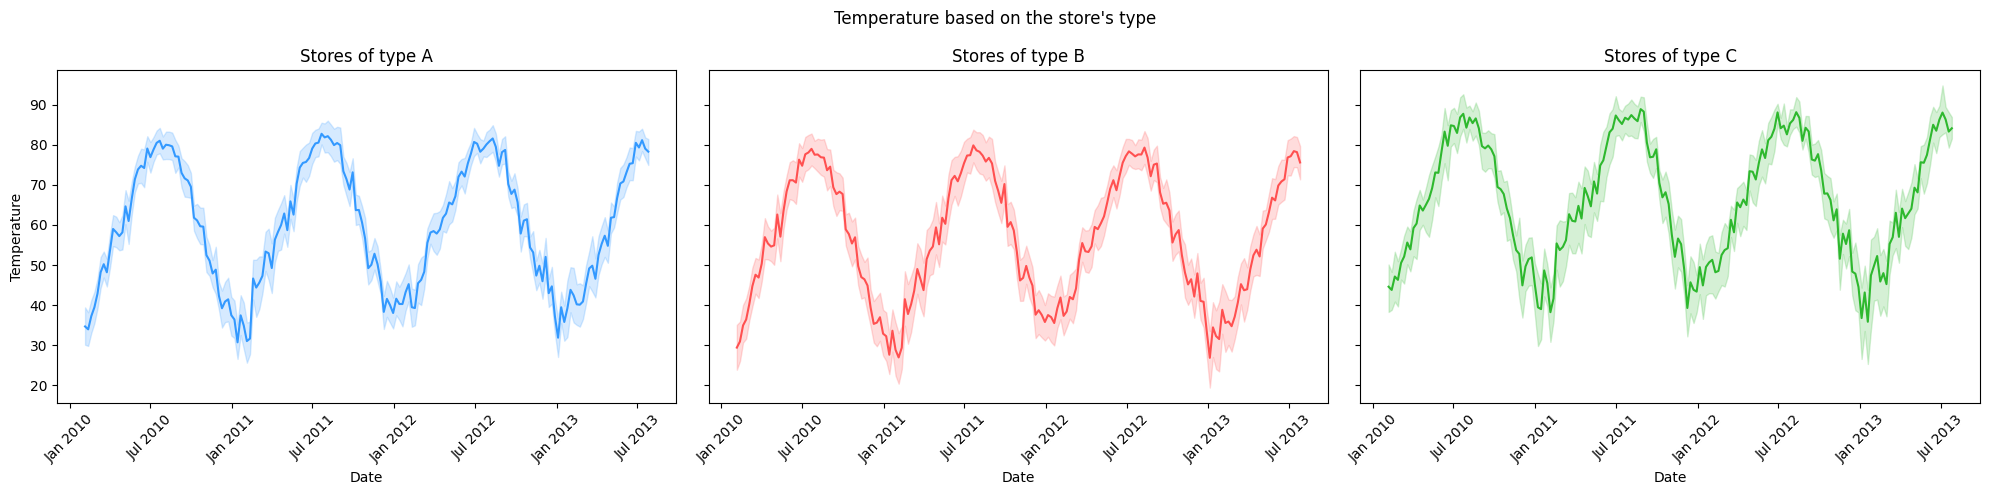

In [28]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(20, 5))
fig.suptitle('Temperatures based on the store\'s type')

# Set date formatter for x-axis
date_format = mdates.DateFormatter('%b %Y')

sns.lineplot(ax=ax[0], x='Date', y='Temperature', data=merged_features_df[merged_features_df['Type'] == 'A'], color=color_palette['A'])
ax[0].set_title('Stores of type A')
ax[0].xaxis.set_major_formatter(date_format)
ax[0].tick_params(axis='x', rotation=45)

sns.lineplot(ax=ax[1], x='Date', y='Temperature', data=merged_features_df[merged_features_df['Type'] == 'B'], color=color_palette['B'])
ax[1].set_title('Stores of type B')
ax[1].xaxis.set_major_formatter(date_format)
ax[1].tick_params(axis='x', rotation=45)

sns.lineplot(ax=ax[2], x='Date', y='Temperature', data=merged_features_df[merged_features_df['Type'] == 'C'], color=color_palette['C'])
ax[2].set_title('Stores of type C')
ax[2].xaxis.set_major_formatter(date_format)
ax[2].tick_params(axis='x', rotation=45)

plt.tight_layout()

## Consumer Price Index based on the store\'s type

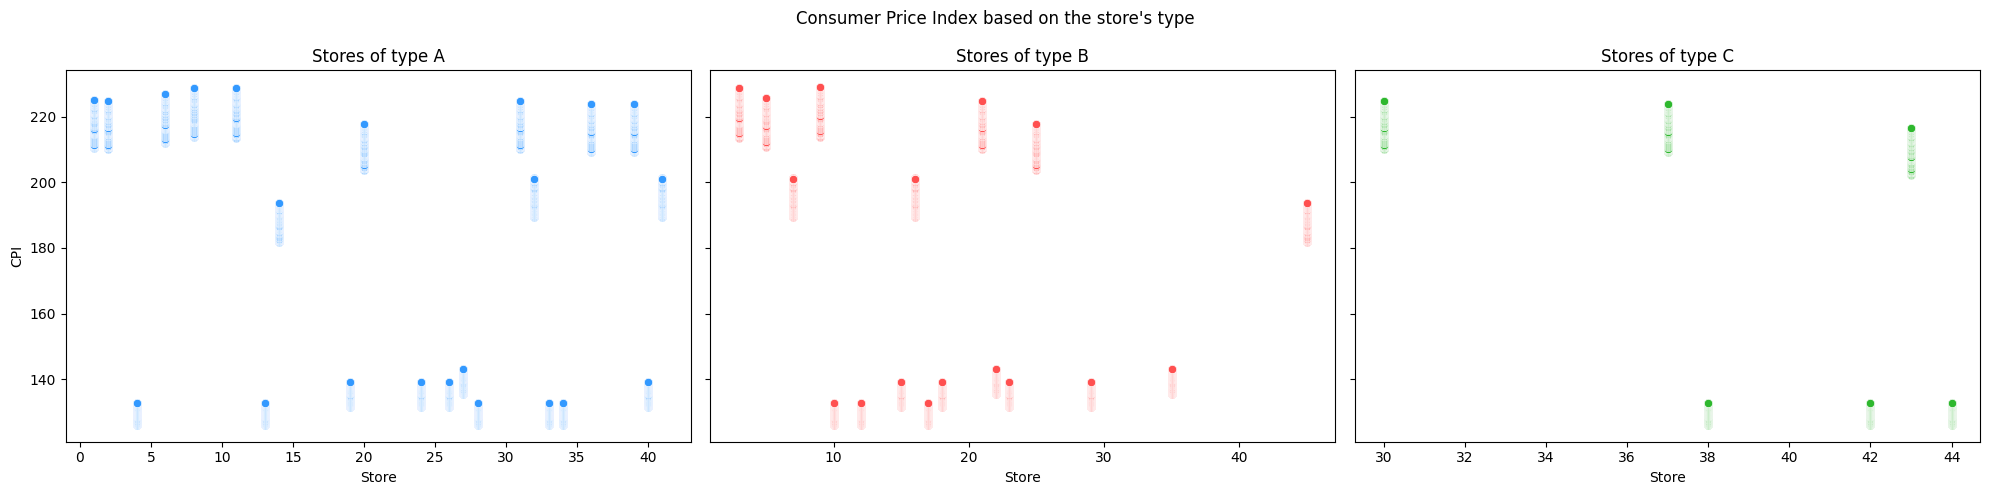

In [68]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(20, 5))
fig.suptitle('Consumer Price Index based on the store\'s type')

# Set date formatter for x-axis
date_format = mdates.DateFormatter('%b %Y')

sns.scatterplot(ax=ax[0], x='Store', y='CPI', data=merged_features_df[merged_features_df['Type'] == 'A'], color=color_palette['A'])
ax[0].set_title('Stores of type A')

sns.scatterplot(ax=ax[1], x='Store', y='CPI', data=merged_features_df[merged_features_df['Type'] == 'B'], color=color_palette['B'])
ax[1].set_title('Stores of type B')

sns.scatterplot(ax=ax[2], x='Store', y='CPI', data=merged_features_df[merged_features_df['Type'] == 'C'], color=color_palette['C'])
ax[2].set_title('Stores of type C')

plt.tight_layout()

## Unemployment rate based on the store's type

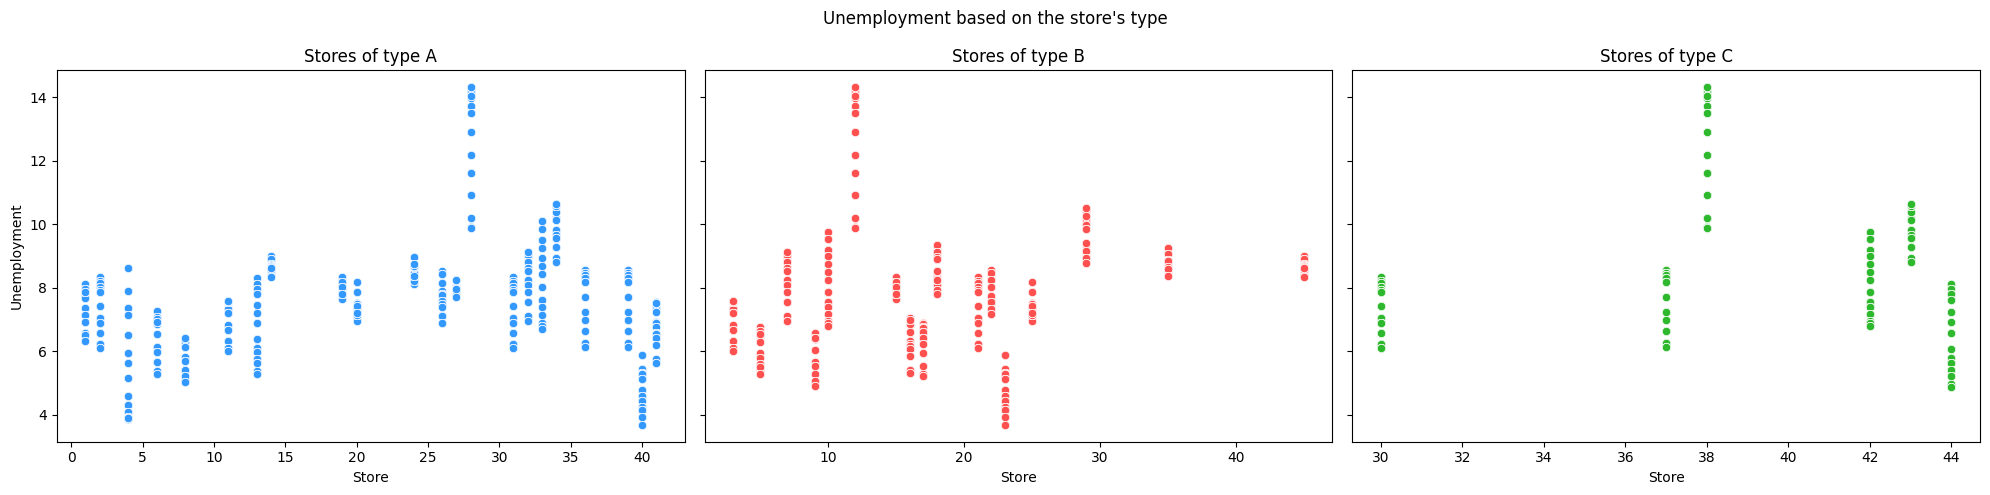

In [69]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(20, 5))
fig.suptitle('Unemployment based on the store\'s type')

# Set date formatter for x-axis
date_format = mdates.DateFormatter('%b %Y')

sns.scatterplot(ax=ax[0], x='Store', y='Unemployment', data=merged_features_df[merged_features_df['Type'] == 'A'], color=color_palette['A'])
ax[0].set_title('Stores of type A')

sns.scatterplot(ax=ax[1], x='Store', y='Unemployment', data=merged_features_df[merged_features_df['Type'] == 'B'], color=color_palette['B'])
ax[1].set_title('Stores of type B')

sns.scatterplot(ax=ax[2], x='Store', y='Unemployment', data=merged_features_df[merged_features_df['Type'] == 'C'], color=color_palette['C'])
ax[2].set_title('Stores of type C')

plt.tight_layout()

## Unemployment rate, Consumer Price Index, Temperatures and Fuel prices based on the store's type

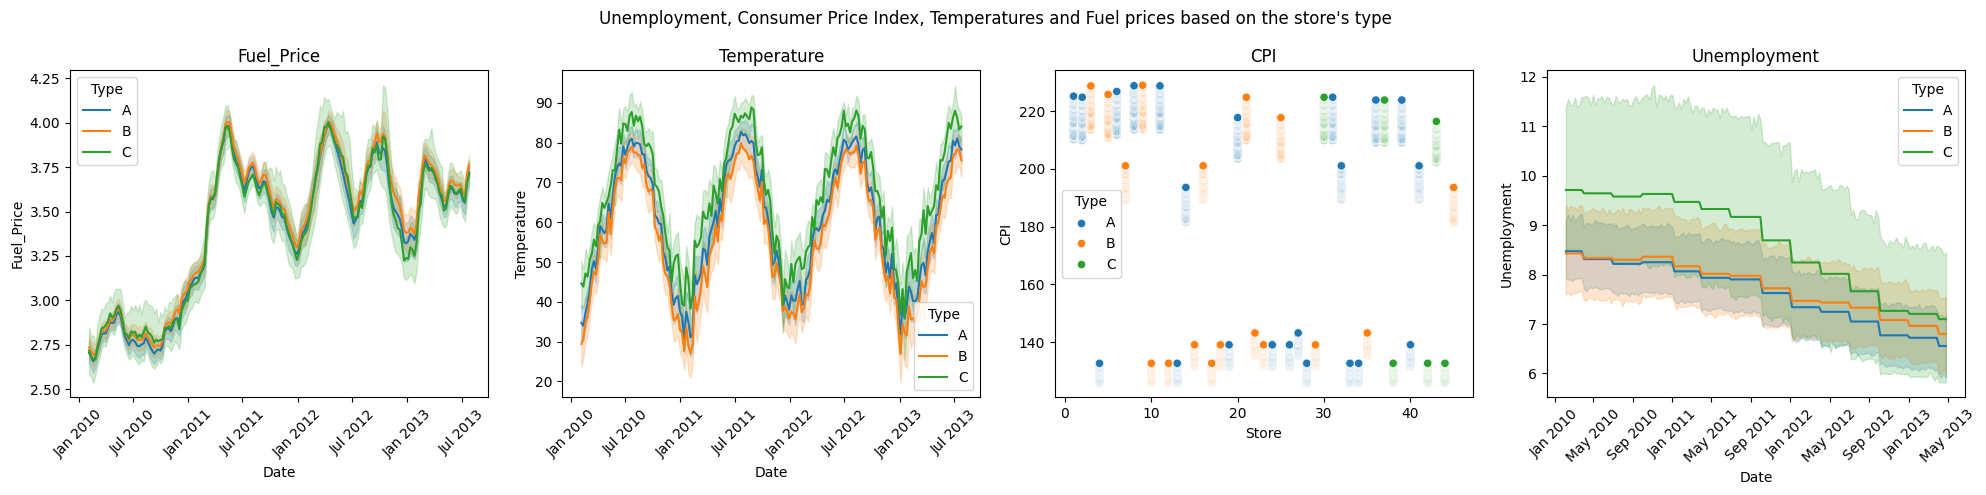

In [70]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
fig.suptitle('Unemployment, Consumer Price Index, Temperatures and Fuel prices based on the store\'s type')

# Set date formatter for x-axis
date_format = mdates.DateFormatter('%b %Y')

sns.lineplot(ax=ax[0], x='Date', y='Fuel_Price', hue='Type', data=merged_features_df, color=color_palette)
ax[0].set_title('Fuel_Price')
ax[0].xaxis.set_major_formatter(date_format)
ax[0].tick_params(axis='x', rotation=45)

sns.lineplot(ax=ax[1], x='Date', y='Temperature', hue='Type', data=merged_features_df, color=color_palette)
ax[1].set_title('Temperature')
ax[1].xaxis.set_major_formatter(date_format)
ax[1].tick_params(axis='x', rotation=45)

sns.scatterplot(ax=ax[2], x='Store', y='CPI', hue='Type', data=merged_features_df, color=color_palette)
ax[2].set_title('CPI')

sns.lineplot(ax=ax[3], x='Date', y='Unemployment', hue='Type', data=merged_features_df, color=color_palette)
ax[3].set_title('Unemployment')
ax[3].xaxis.set_major_formatter(date_format)
ax[3].tick_params(axis='x', rotation=45)

plt.tight_layout()

## Fuel prices from 2010 to 2012

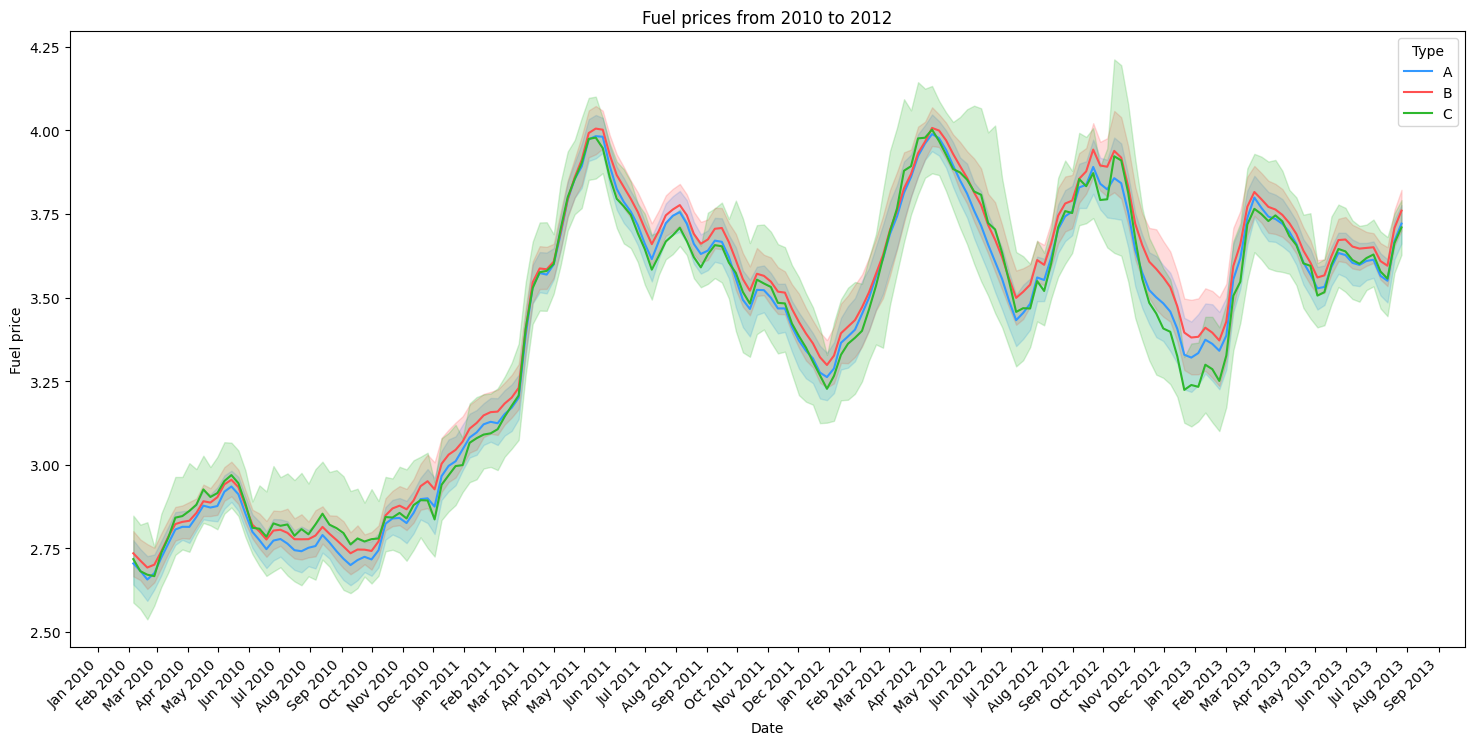

In [32]:
fig, ax = plt.subplots(figsize=(18, 8))
sns.lineplot(x=merged_features_df['Date'], y=merged_features_df['Fuel_Price'], hue='Type', data=merged_features_df, palette=color_palette)

plt.title('Fuel prices from 2010 to 2012')
plt.xlabel('Date')
plt.ylabel('Fuel price')

plt.xticks(rotation=45, ha='right')

# Set x-axis major locator to monthly frequency
ax.xaxis.set_major_locator(mdates.MonthLocator())

# Format the x-axis tick labels as Month-Year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.show()

## Temperatures from 2010 to 2012

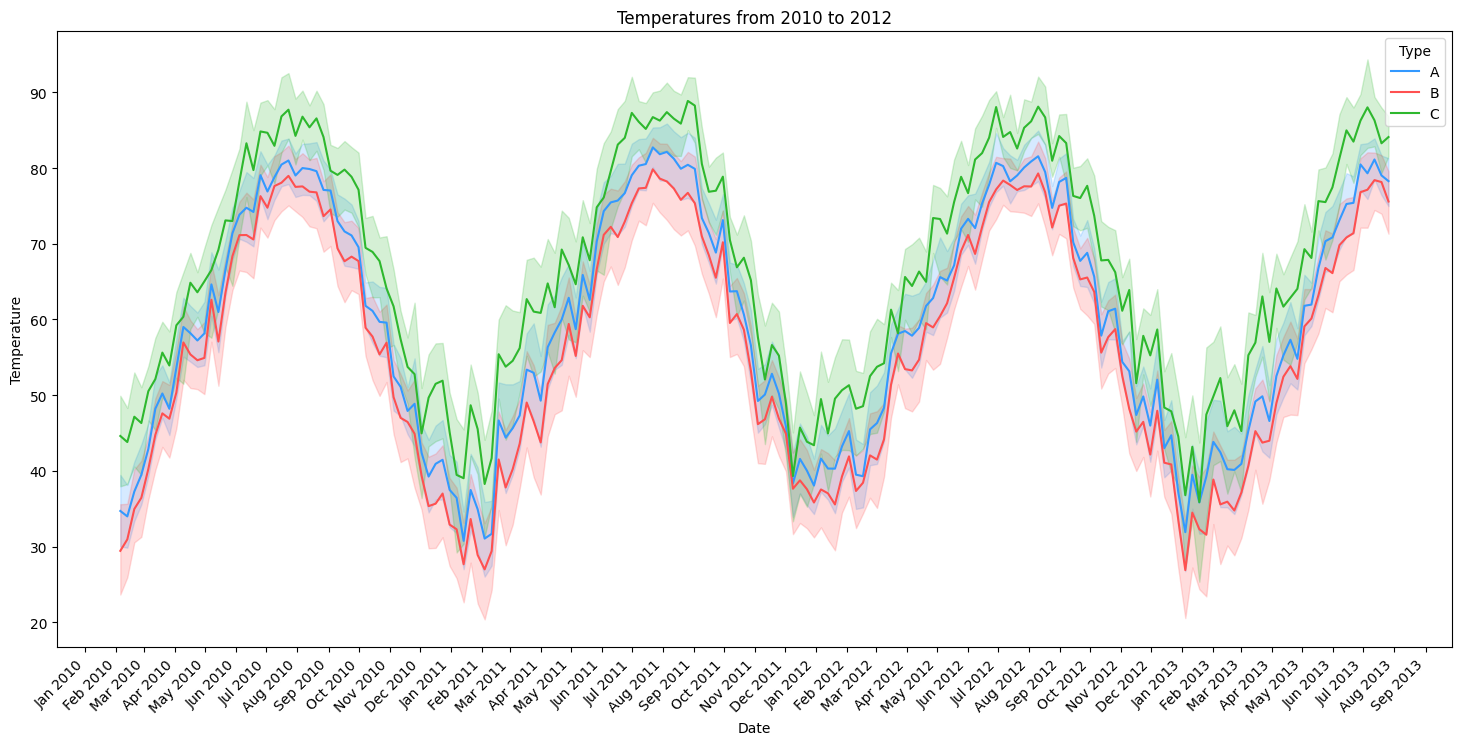

In [33]:
fig, ax = plt.subplots(figsize=(18, 8))
sns.lineplot(x=merged_features_df['Date'], y=merged_features_df['Temperature'], hue='Type', data=merged_features_df, palette=color_palette)

plt.title('Temperatures from 2010 to 2012')
plt.xlabel('Date')
plt.ylabel('Temperature')

plt.xticks(rotation=45, ha='right')

# Set x-axis major locator to monthly frequency
ax.xaxis.set_major_locator(mdates.MonthLocator())

# Format the x-axis tick labels as Month-Year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.show()

## Consumer Price Index development 

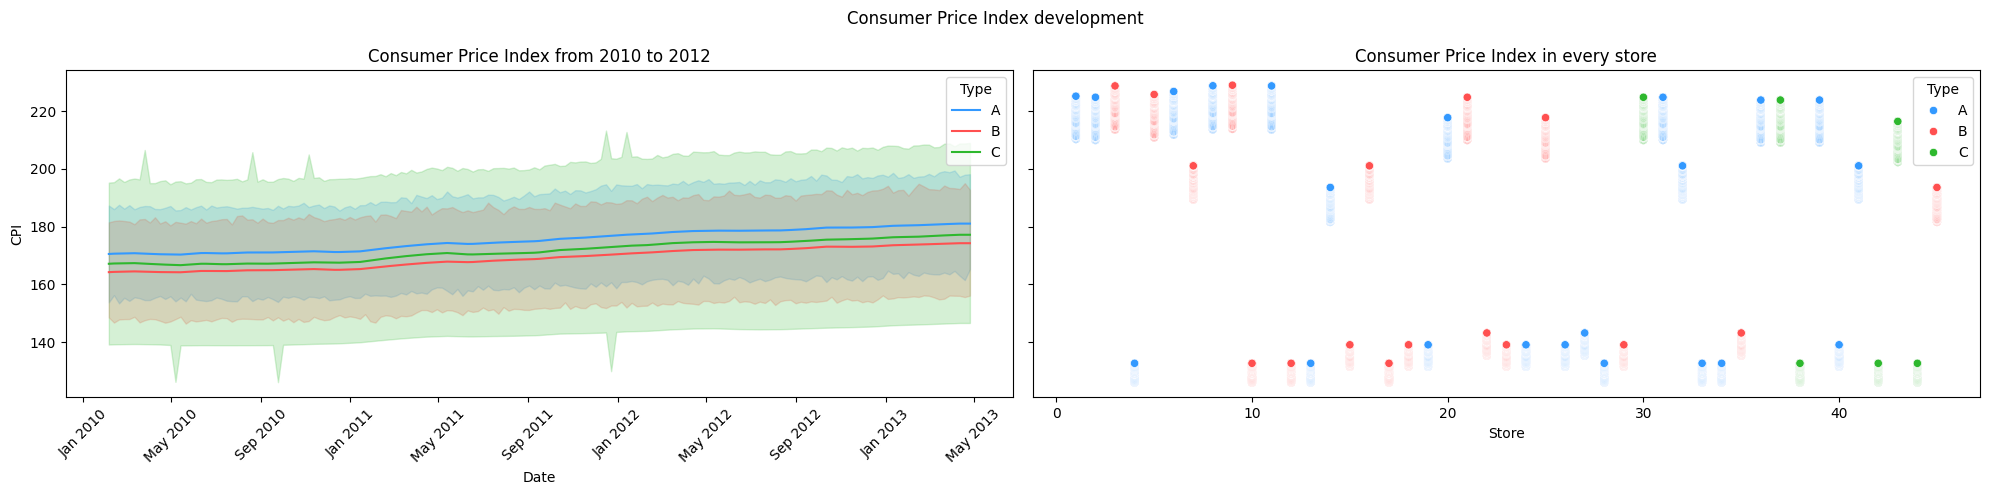

In [72]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
fig.suptitle('Consumer Price Index development')

# Set date formatter for x-axis
date_format = mdates.DateFormatter('%b %Y')

sns.lineplot(ax=ax[0], x=merged_features_df['Date'], y=merged_features_df['CPI'], hue='Type', data=merged_features_df, palette=color_palette)
ax[0].set_title('Consumer Price Index from 2010 to 2012')
ax[0].xaxis.set_major_formatter(date_format)
ax[0].tick_params(axis='x', rotation=45)

sns.scatterplot(ax=ax[1], x=merged_features_df['Store'], y=merged_features_df['CPI'], hue='Type', data=merged_features_df, palette=color_palette)
ax[1].set_title('Consumer Price Index in every store')

plt.tight_layout()

## Unemployment rate development

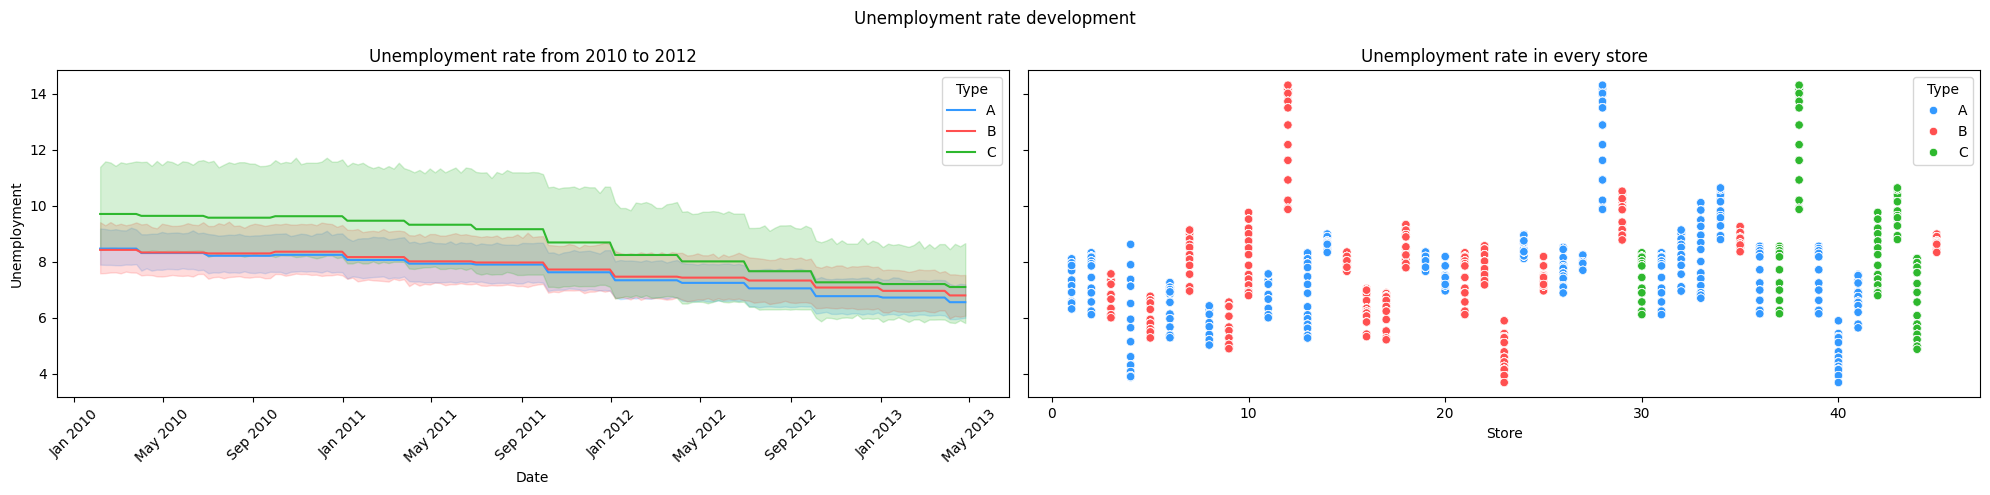

In [73]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
fig.suptitle('Unemployment rate development')

# Set date formatter for x-axis
date_format = mdates.DateFormatter('%b %Y')

sns.lineplot(ax=ax[0], x=merged_features_df['Date'], y=merged_features_df['Unemployment'], hue='Type', data=merged_features_df, palette=color_palette)
ax[0].set_title('Unemployment rate from 2010 to 2012')
ax[0].xaxis.set_major_formatter(date_format)
ax[0].tick_params(axis='x', rotation=45)

sns.scatterplot(ax=ax[1], x=merged_features_df['Store'], y=merged_features_df['Unemployment'], hue='Type', data=merged_features_df, palette=color_palette)
ax[1].set_title('Unemployment rate in every store')

plt.tight_layout()

## Pairplot of the four factors

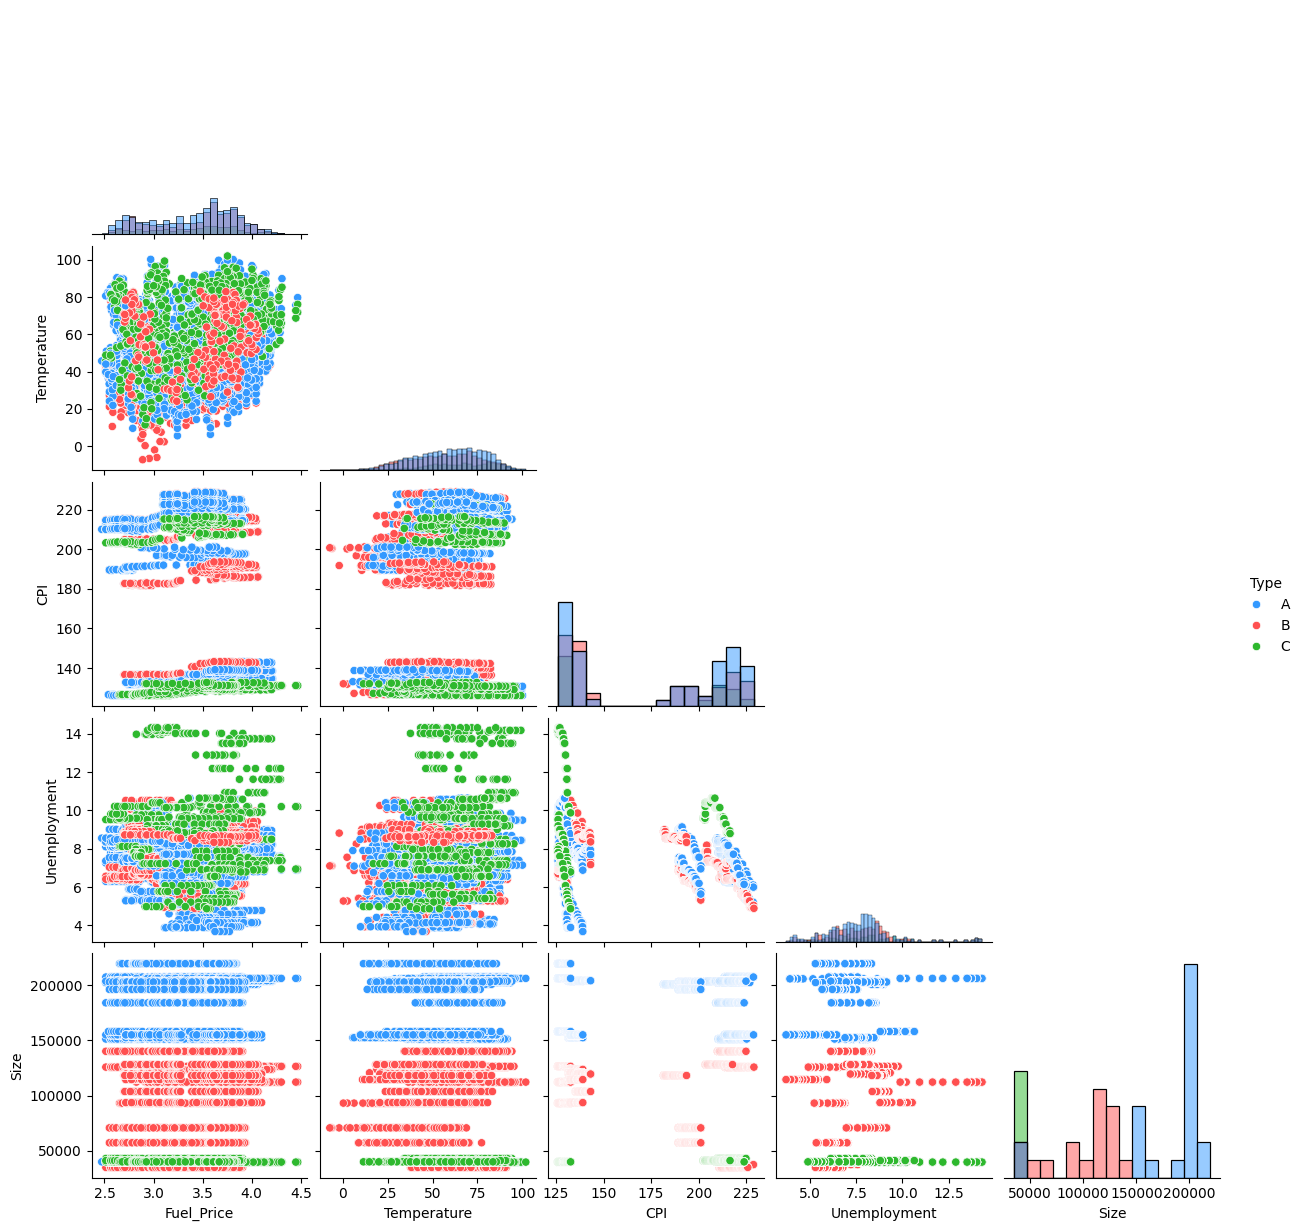

In [80]:
selected_columns = merged_features_df[['Fuel_Price', 'Temperature', 'CPI', 'Unemployment', 'Size', 'Type']]

sns.pairplot(selected_columns, hue='Type', palette=color_palette, diag_kind='hist', corner=True)
plt.show()

### Observations
<ul>
    <li>The majority of stores have low average unemployment rates, which coincide with high Consumer Price Index (CPI) rates.</li>
    <li>There appears to be little correlation between fuel prices and temperatures.</li>
</ul>

# Merging the stores, train, features datasets

In [37]:
def load_data():
    # Load Data
    df_raw = pd.read_csv('train.csv')
    display(df_raw.head())
    df_stores = pd.read_csv('stores.csv')
    display(df_stores.head())
    df_features = pd.read_csv('features.csv')
    display(df_features.head())

    merged_df = df_raw.merge(df_stores, on='Store')
    feature_cols_to_use = ['Store', 'Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
    merged_df = merged_df.merge(df_features[feature_cols_to_use], on=['Store', 'Date'])
    display(merged_df.head())
    return merged_df

merged_df = load_data()

Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False

Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False

Store  Dept        Date  Weekly_Sales  IsHoliday Type    Size  Temperature  \
0      1     1  2010-02-05      24924.50      False    A  151315        42.31   
1      1     2  2010-02-05      50605.27      False    A  151315        42.31   
2      1     3  2010-02-05      13740.12      False    A  151315        42.31   
3      1     4  2010-02-05      39954.04      False    A  151315        42.31   
4      1     5  2010-02-05      32229.38      False    A  151315        42.31   

   Fuel_Price         CPI  Unemployment  
0       2.572  211.096358         8.106  
1       2.572  211.096358         8.106  
2       2.572  211.096358         8.106  
3       2.572  211.096358         8.106  
4       2.572  211.096358         8.106

In [38]:
merged_df.head()

Store  Dept        Date  Weekly_Sales  IsHoliday Type    Size  Temperature  \
0      1     1  2010-02-05      24924.50      False    A  151315        42.31   
1      1     2  2010-02-05      50605.27      False    A  151315        42.31   
2      1     3  2010-02-05      13740.12      False    A  151315        42.31   
3      1     4  2010-02-05      39954.04      False    A  151315        42.31   
4      1     5  2010-02-05      32229.38      False    A  151315        42.31   

   Fuel_Price         CPI  Unemployment  
0       2.572  211.096358         8.106  
1       2.572  211.096358         8.106  
2       2.572  211.096358         8.106  
3       2.572  211.096358         8.106  
4       2.572  211.096358         8.106

In [39]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   CPI           421570 non-null  float64
 10  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(5), int64(3), object(2)
memory usage: 32.6+ MB


In [40]:
merged_df.describe()

Store           Dept   Weekly_Sales           Size  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean       22.200546      44.260317   15981.258123  136727.915739   
std        12.785297      30.492054   22711.183519   60980.583328   
min         1.000000       1.000000   -4988.940000   34875.000000   
25%        11.000000      18.000000    2079.650000   93638.000000   
50%        22.000000      37.000000    7612.030000  140167.000000   
75%        33.000000      74.000000   20205.852500  202505.000000   
max        45.000000      99.000000  693099.360000  219622.000000   

         Temperature     Fuel_Price            CPI   Unemployment  
count  421570.000000  421570.000000  421570.000000  421570.000000  
mean       60.090059       3.361027     171.201947       7.960289  
std        18.447931       0.458515      39.159276       1.863296  
min        -2.060000       2.472000     126.064000       3.879000  
25%        46.680000       2.933000     132.022667       6.891000  
50%        62.090000       3.452000     182.318780       7.866000  
75%        74.280000       3.738000     212.416993       8.572000  
max       100.140000       4.468000     227.232807      14.313000

## Weekly sales based on unemployment rate, Consumer Price Index, temperature and fuel prices

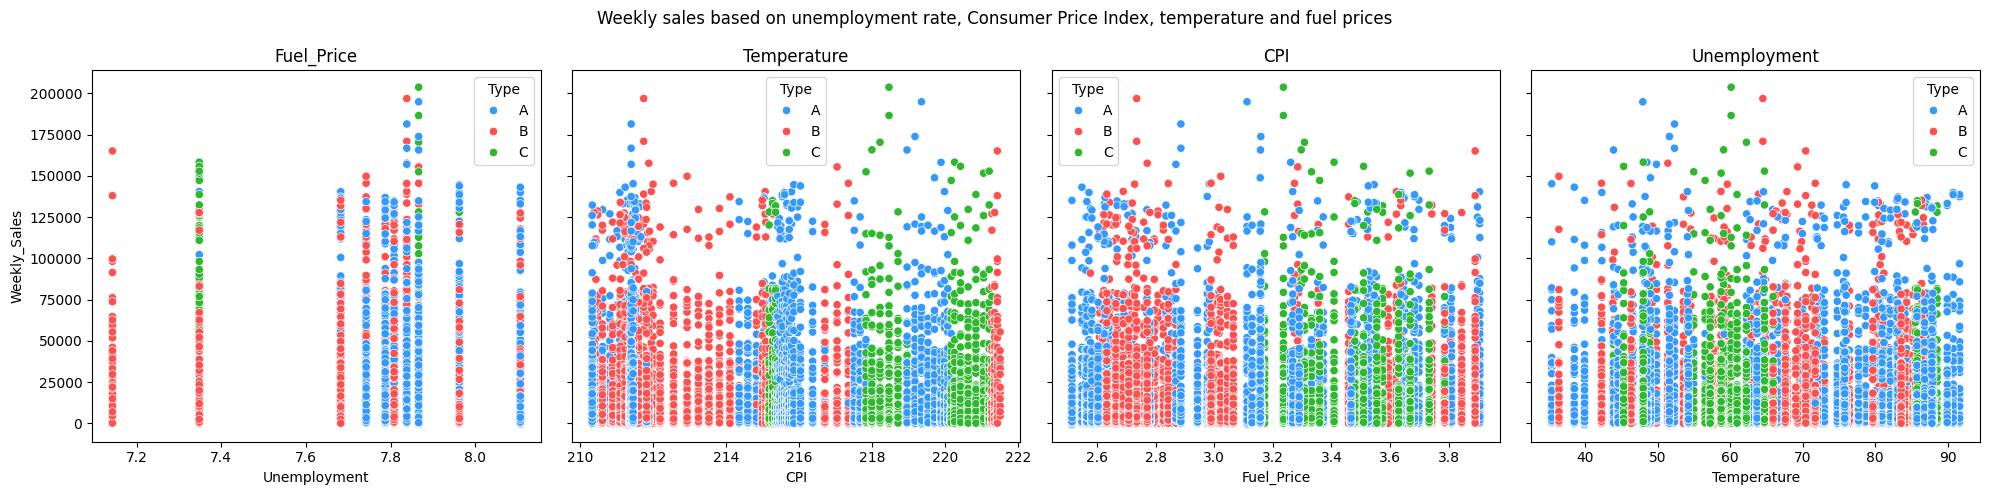

In [75]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
fig.suptitle('Weekly sales based on unemployment rate, Consumer Price Index, temperature and fuel prices')

sns.scatterplot(ax=ax[0], x=merged_df['Unemployment'], y=merged_df['Weekly_Sales'], hue='Type', data=merged_features_df, palette=color_palette)
ax[0].set_title('Fuel_Price')

sns.scatterplot(ax=ax[1], x=merged_df['CPI'], y=merged_df['Weekly_Sales'], hue='Type', data=merged_features_df, palette=color_palette)
ax[1].set_title('Temperature')

sns.scatterplot(ax=ax[2], x=merged_df['Fuel_Price'], y=merged_df['Weekly_Sales'], hue='Type', data=merged_features_df, palette=color_palette)
ax[2].set_title('CPI')

sns.scatterplot(ax=ax[3], x=merged_df['Temperature'], y=merged_df['Weekly_Sales'], hue='Type', data=merged_features_df, palette=color_palette)
ax[3].set_title('Unemployment')

plt.tight_layout()

### Observations
The four key factors, namely fuel prices, temperature, the Consumer Price Index, and the unemployment rate, have little impact on weekly sales inmost stores.

# Preparing the datasets for the prediction

## Merging the datasets into a training dataset and test dataset

In [81]:
train_df['Date'] = pd.to_datetime(train_df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])

# Training dataset
dataset = train_df.merge(stores_df, how='left').merge(features_df, how='left')

# Testing dataset
test_dataset = test_df.merge(stores_df, how='left').merge(features_df, how='left')

In [78]:
dataset

Store  Dept       Date  Weekly_Sales  IsHoliday Type    Size  \
0           1     1 2010-02-05      24924.50      False    A  151315   
1           1     1 2010-02-12      46039.49       True    A  151315   
2           1     1 2010-02-19      41595.55      False    A  151315   
3           1     1 2010-02-26      19403.54      False    A  151315   
4           1     1 2010-03-05      21827.90      False    A  151315   
...       ...   ...        ...           ...        ...  ...     ...   
421565     45    98 2012-09-28        508.37      False    B  118221   
421566     45    98 2012-10-05        628.10      False    B  118221   
421567     45    98 2012-10-12       1061.02      False    B  118221   
421568     45    98 2012-10-19        760.01      False    B  118221   
421569     45    98 2012-10-26       1076.80      False    B  118221   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0             42.31       2.572        NaN        NaN        NaN        NaN   
1             38.51       2.548        NaN        NaN        NaN        NaN   
2             39.93       2.514        NaN        NaN        NaN        NaN   
3             46.63       2.561        NaN        NaN        NaN        NaN   
4             46.50       2.625        NaN        NaN        NaN        NaN   
...             ...         ...        ...        ...        ...        ...   
421565        64.88       3.997    4556.61      20.64       1.50    1601.01   
421566        64.89       3.985    5046.74        NaN      18.82    2253.43   
421567        54.47       4.000    1956.28        NaN       7.89     599.32   
421568        56.47       3.969    2004.02        NaN       3.18     437.73   
421569        58.85       3.882    4018.91      58.08     100.00     211.94   

        MarkDown5         CPI  Unemployment  
0             NaN  211.096358         8.106  
1             NaN  211.242170         8.106  
2             NaN  211.289143         8.106  
3             NaN  211.319643         8.106  
4             NaN  211.350143         8.106  
...           ...         ...           ...  
421565    3288.25  192.013558         8.684  
421566    2340.01  192.170412         8.667  
421567    3990.54  192.327265         8.667  
421568    1537.49  192.330854         8.667  
421569     858.33  192.308899         8.667  

[421570 rows x 16 columns]

In [83]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     150681 non-null  float64       
 10  MarkDown2     111248 non-null  float64       
 11  MarkDown3     137091 non-null  float64       
 12  MarkDown4     134967 non-null  float64       
 13  MarkDown5     151432 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

In [84]:
dataset.describe()

Store           Dept                           Date  \
count  421570.000000  421570.000000                         421570   
mean       22.200546      44.260317  2011-06-18 08:30:31.963375104   
min         1.000000       1.000000            2010-02-05 00:00:00   
25%        11.000000      18.000000            2010-10-08 00:00:00   
50%        22.000000      37.000000            2011-06-17 00:00:00   
75%        33.000000      74.000000            2012-02-24 00:00:00   
max        45.000000      99.000000            2012-10-26 00:00:00   
std        12.785297      30.492054                            NaN   

        Weekly_Sales           Size    Temperature     Fuel_Price  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean    15981.258123  136727.915739      60.090059       3.361027   
min     -4988.940000   34875.000000      -2.060000       2.472000   
25%      2079.650000   93638.000000      46.680000       2.933000   
50%      7612.030000  140167.000000      62.090000       3.452000   
75%     20205.852500  202505.000000      74.280000       3.738000   
max    693099.360000  219622.000000     100.140000       4.468000   
std     22711.183519   60980.583328      18.447931       0.458515   

           MarkDown1      MarkDown2      MarkDown3      MarkDown4  \
count  150681.000000  111248.000000  137091.000000  134967.000000   
mean     7246.420196    3334.628621    1439.421384    3383.168256   
min         0.270000    -265.760000     -29.100000       0.220000   
25%      2240.270000      41.600000       5.080000     504.220000   
50%      5347.450000     192.000000      24.600000    1481.310000   
75%      9210.900000    1926.940000     103.990000    3595.040000   
max     88646.760000  104519.540000  141630.610000   67474.850000   
std      8291.221345    9475.357325    9623.078290    6292.384031   

           MarkDown5            CPI   Unemployment  
count  151432.000000  421570.000000  421570.000000  
mean     4628.975079     171.201947       7.960289  
min       135.160000     126.064000       3.879000  
25%      1878.440000     132.022667       6.891000  
50%      3359.450000     182.318780       7.866000  
75%      5563.800000     212.416993       8.572000  
max    108519.280000     227.232807      14.313000  
std      5962.887455      39.159276       1.863296

In [85]:
test_dataset

Store  Dept       Date  IsHoliday Type    Size  Temperature  \
0           1     1 2012-11-02      False    A  151315        55.32   
1           1     1 2012-11-09      False    A  151315        61.24   
2           1     1 2012-11-16      False    A  151315        52.92   
3           1     1 2012-11-23       True    A  151315        56.23   
4           1     1 2012-11-30      False    A  151315        52.34   
...       ...   ...        ...        ...  ...     ...          ...   
115059     45    98 2013-06-28      False    B  118221        76.05   
115060     45    98 2013-07-05      False    B  118221        77.50   
115061     45    98 2013-07-12      False    B  118221        79.37   
115062     45    98 2013-07-19      False    B  118221        82.84   
115063     45    98 2013-07-26      False    B  118221        76.06   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0            3.386    6766.44    5147.70      50.82    3639.90    2737.42   
1            3.314   11421.32    3370.89      40.28    4646.79    6154.16   
2            3.252    9696.28     292.10     103.78    1133.15    6612.69   
3            3.211     883.59       4.17   74910.32     209.91     303.32   
4            3.207    2460.03        NaN    3838.35     150.57    6966.34   
...            ...        ...        ...        ...        ...        ...   
115059       3.639    4842.29     975.03       3.00    2449.97    3169.69   
115060       3.614    9090.48    2268.58     582.74    5797.47    1514.93   
115061       3.614    3789.94    1827.31      85.72     744.84    2150.36   
115062       3.737    2961.49    1047.07     204.19     363.00    1059.46   
115063       3.804     212.02     851.73       2.06      10.88    1864.57   

               CPI  Unemployment  
0       223.462779         6.573  
1       223.481307         6.573  
2       223.512911         6.573  
3       223.561947         6.573  
4       223.610984         6.573  
...            ...           ...  
115059         NaN           NaN  
115060         NaN           NaN  
115061         NaN           NaN  
115062         NaN           NaN  
115063         NaN           NaN  

[115064 rows x 15 columns]

In [86]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         115064 non-null  int64         
 1   Dept          115064 non-null  int64         
 2   Date          115064 non-null  datetime64[ns]
 3   IsHoliday     115064 non-null  bool          
 4   Type          115064 non-null  object        
 5   Size          115064 non-null  int64         
 6   Temperature   115064 non-null  float64       
 7   Fuel_Price    115064 non-null  float64       
 8   MarkDown1     114915 non-null  float64       
 9   MarkDown2     86437 non-null   float64       
 10  MarkDown3     105235 non-null  float64       
 11  MarkDown4     102176 non-null  float64       
 12  MarkDown5     115064 non-null  float64       
 13  CPI           76902 non-null   float64       
 14  Unemployment  76902 non-null   float64       
dtypes: bool(1), datet

In [87]:
test_dataset.describe()

Store           Dept                           Date  \
count  115064.000000  115064.000000                         115064   
mean       22.238207      44.339524  2013-03-14 14:39:41.311270144   
min         1.000000       1.000000            2012-11-02 00:00:00   
25%        11.000000      18.000000            2013-01-04 00:00:00   
50%        22.000000      37.000000            2013-03-15 00:00:00   
75%        33.000000      74.000000            2013-05-24 00:00:00   
max        45.000000      99.000000            2013-07-26 00:00:00   
std        12.809930      30.656410                            NaN   

                Size    Temperature     Fuel_Price      MarkDown1  \
count  115064.000000  115064.000000  115064.000000  114915.000000   
mean   136497.688921      53.941804       3.581546    7689.216439   
min     34875.000000      -7.290000       2.872000   -2781.450000   
25%     93638.000000      39.820000       3.431000    1966.460000   
50%    140167.000000      54.470000       3.606000    4842.290000   
75%    202505.000000      67.350000       3.766000    9439.140000   
max    219622.000000     101.950000       4.125000  103184.980000   
std     61106.926438      18.724153       0.239442   10698.760716   

          MarkDown2      MarkDown3      MarkDown4      MarkDown5  \
count  86437.000000  105235.000000  102176.000000  115064.000000   
mean    3734.051729    2403.088666    3356.219071    3922.681189   
min      -35.740000    -179.260000       0.220000    -185.170000   
25%      180.350000      15.100000     155.460000    1309.300000   
50%      742.590000      78.260000     840.940000    2390.430000   
75%     2735.670000     272.580000    3096.920000    4227.270000   
max    71074.170000  149483.310000   65344.640000  771448.100000   
std     8323.495014   13767.939313    7570.501545   19445.150745   

                CPI  Unemployment  
count  76902.000000  76902.000000  
mean     176.961347      6.868733  
min      131.236226      3.684000  
25%      138.402033      5.771000  
50%      192.304445      6.806000  
75%      223.244532      8.036000  
max      228.976456     10.199000  
std       41.239967      1.583427

## Heatmap

<Axes: >

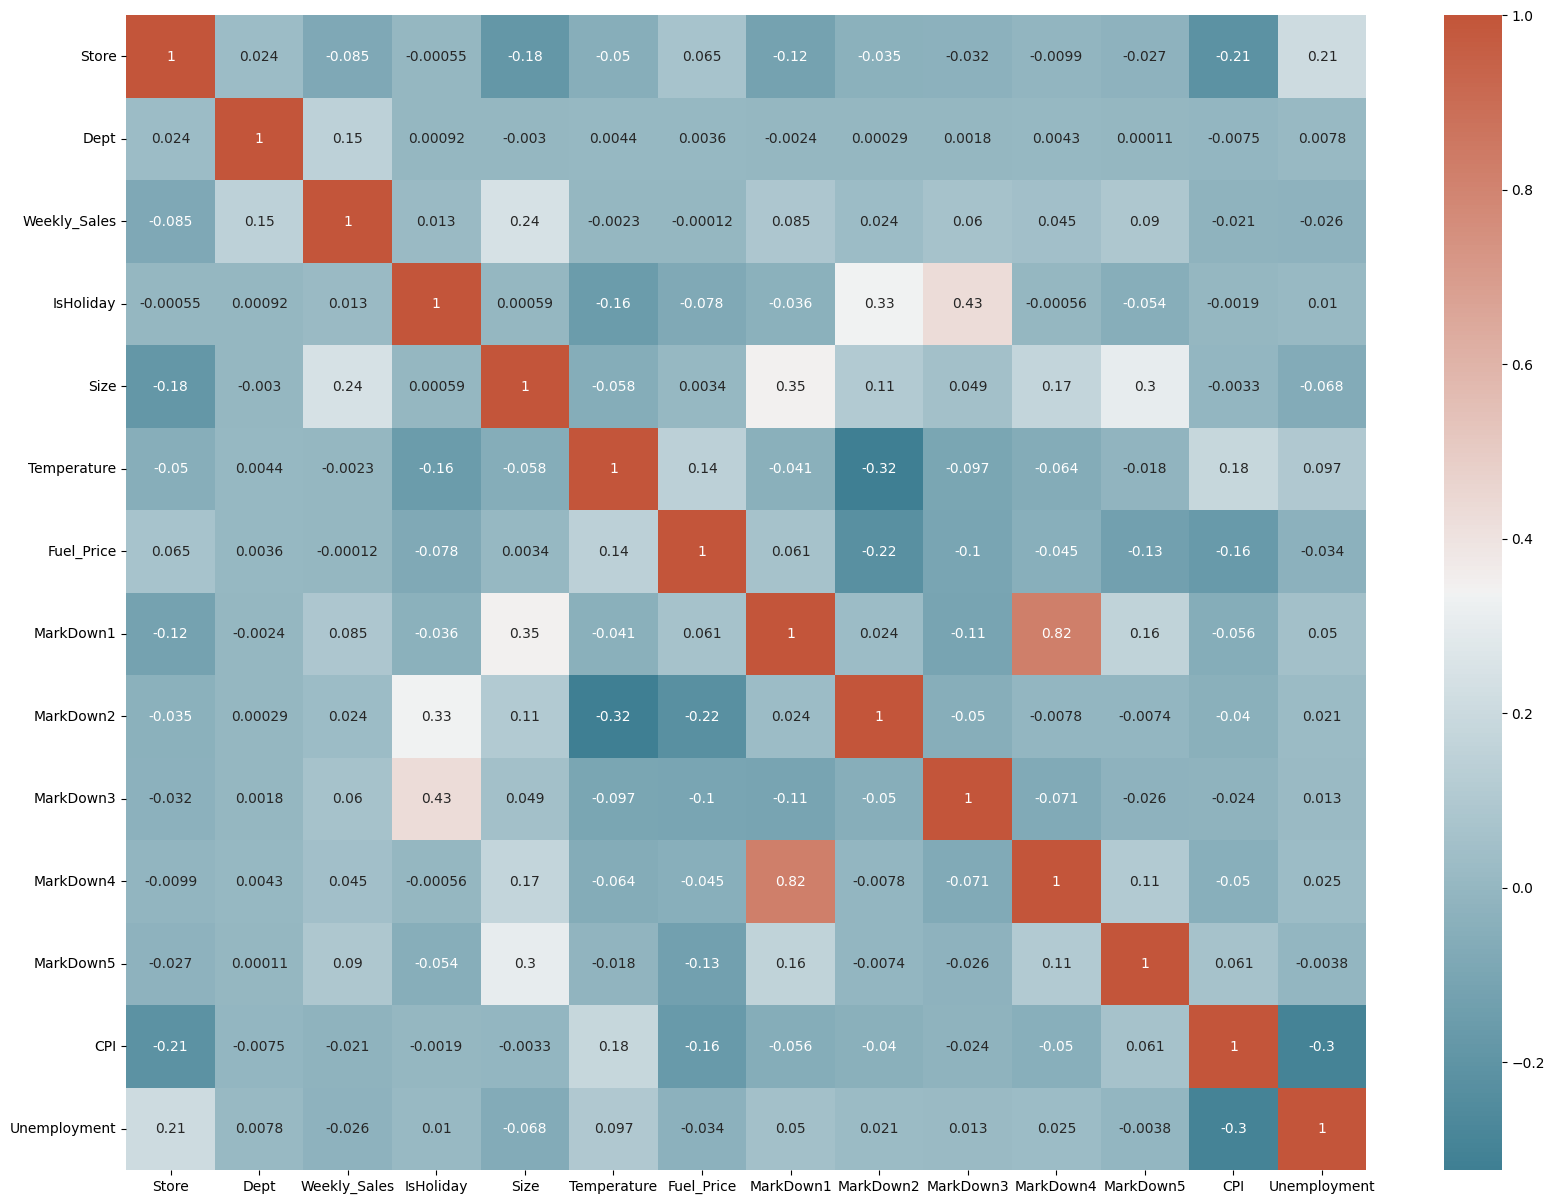

In [49]:
f, ax = plt.subplots(figsize=(20, 15))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(dataset.corr(numeric_only=True), cmap=cmap, annot = True)

### Observations
There's a lack of a strong correlation between the previously mentioned factors, with the exception of the relationship between weekly sales and store sizes, as well as notable correlations among certain markdowns.

# Random Forest Regressor model

<ul>
    <li><b>Removing null values from the markdown variables.</b></li>
    <li><b>Creating variables for year, month and week, based on the date field.</b></li>
    <li><b>Removing the variables with low correlation.</b></li>
</ul>

In [50]:
dataset[['MarkDown1','MarkDown2','MarkDown3','MarkDown4', 'MarkDown5']] = dataset[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)
dataset['Year'] = pd.to_datetime(dataset['Date']).dt.year
dataset['Month'] = pd.to_datetime(dataset['Date']).dt.month
dataset['Week'] = pd.to_datetime(dataset['Date']).dt.isocalendar().week
dataset = dataset.drop(columns=["Date", "CPI", "Fuel_Price", 'Unemployment', 'Temperature'])

# We can move the target variable to the last column of the dataframe to ease the manipulation of the data.
df = dataset.pop('Weekly_Sales')
dataset['Weekly_Sales'] = df

# We identify inputs and target columns.
input_cols, target_col = dataset.columns[:-1], dataset.columns[-1]
inputs_df, targets = dataset[input_cols].copy(), dataset[target_col].copy()

# We identify numeric and categorical columns.
numeric_cols = dataset[input_cols].select_dtypes(include=np.number).columns.tolist()
categorical_cols = dataset[input_cols].select_dtypes(include='object').columns.tolist()

# We impute (fill) and scale numeric columns.
imputer = SimpleImputer().fit(inputs_df[numeric_cols])
inputs_df[numeric_cols] = imputer.transform(inputs_df[numeric_cols])
scaler = MinMaxScaler().fit(inputs_df[numeric_cols])
inputs_df[numeric_cols] = scaler.transform(inputs_df[numeric_cols])

# One hot encoding involves adding a new binary (0/1) column for each unique category of a categorical column.
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(inputs_df[categorical_cols])

encoded_data = encoder.transform(inputs_df[categorical_cols])
encoded_cols = [f"{col}_{val}" for col, values in zip(categorical_cols, encoder.categories_) for val in values]
encoded_df = pd.DataFrame(encoded_data, columns=encoded_cols)

inputs_df = pd.concat([inputs_df, encoded_df], axis=1)

c:\Users\UNITECH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Splitting the dataset into a training and validation set (25% for each)

In [88]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs_df[numeric_cols + encoded_cols], targets, test_size=0.25, random_state=42)

## Hyperparameter tuning

Hyperparameter tuning will alow us to search for the best set of hyperparameters for our model to optimize its performance

In [98]:
# Tests the given value of one or more hyperparameters.
def test_params(**params):
    model = RandomForestRegressor(random_state=0, n_jobs=-1, n_estimators=16, **params).fit(train_inputs, train_targets)
    train_rmse = mean_squared_error(model.predict(train_inputs), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(val_inputs), val_targets, squared=False)
    return train_rmse, val_rmse

In [99]:
# Tests and plots different values of a single parameter.
def test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_rmse, val_rmse = test_params(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

In [100]:
test_params()

(1548.5853812667879, 3952.4619494363683)

Better results with a number of estimators of 16.

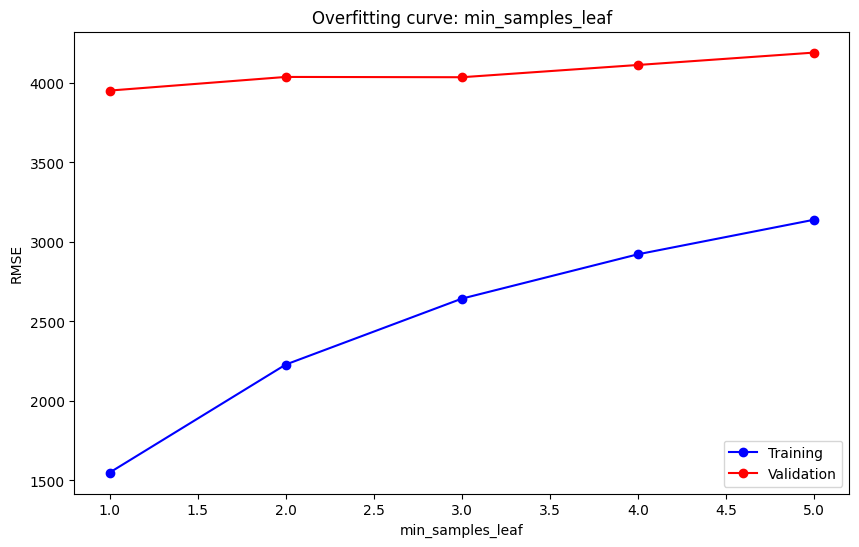

In [101]:
test_param_and_plot('min_samples_leaf', [1, 2, 3, 4, 5])

In [102]:
test_params(min_samples_leaf = 5)

(3139.860605280673, 4191.528032848276)

According to the plot, the RMSE increases when we use a higher number of min_samples_leaf parameter so we'll use a default value of 1.

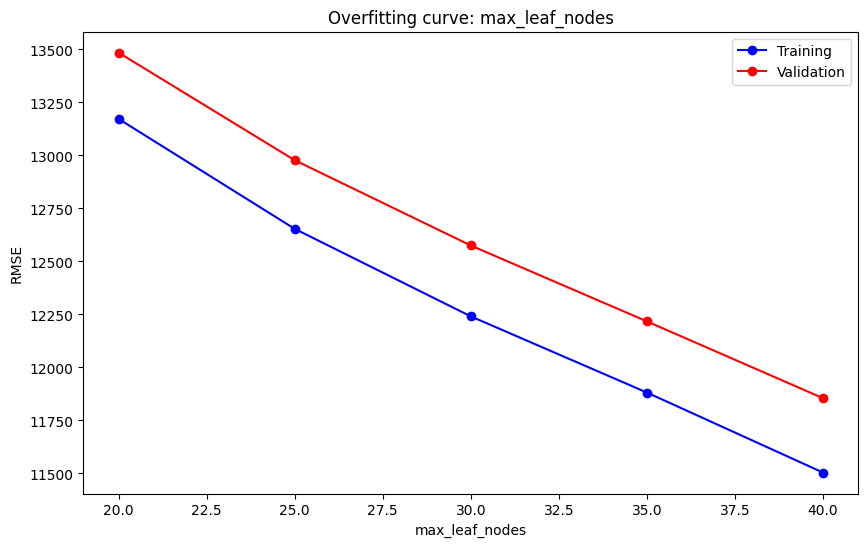

In [103]:
test_param_and_plot('max_leaf_nodes', [20, 25, 30, 35, 40])

In [104]:
test_params(max_leaf_nodes = 20)

(13172.465920710169, 13485.14172240374)

According to the plot, the RMSE decreases when we use the max_leaf_nodes parameter so we'll use a default value of none.

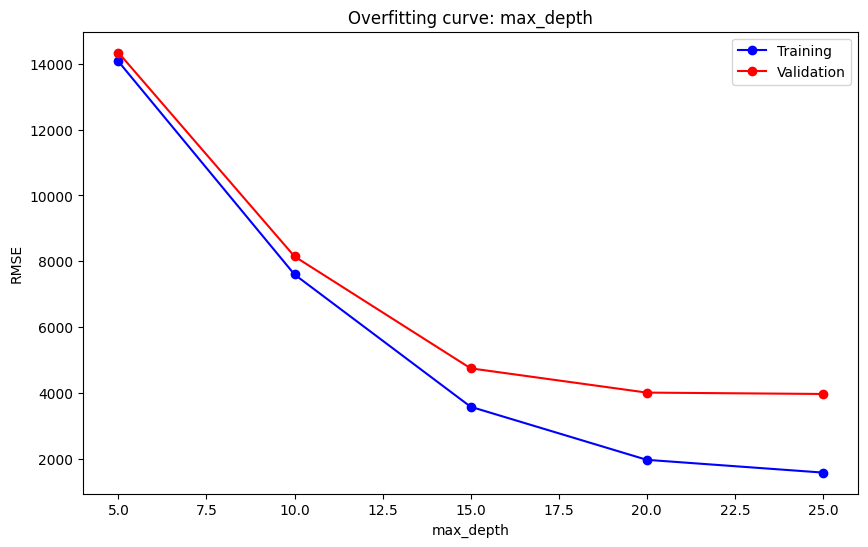

In [105]:
test_param_and_plot('max_depth', [5, 10, 15, 20, 25])

In [106]:
test_params(max_depth = 10)

(7597.636234551192, 8145.9748443797225)

According to the plot, the RMSE decreases when we use the max_depth parameter so we'll use a default value of none.

## Training the model

In [52]:
model = RandomForestRegressor(n_estimators=16, random_state = 0, min_samples_leaf = 1)
model.fit(train_inputs, train_targets)

model_train_preds = model.predict(train_inputs)
model_train_rmse = mean_squared_error(train_targets, model_train_preds, squared=False)
model_val_preds = model.predict(val_inputs)
model_val_rmse = mean_squared_error(val_targets, model_val_preds, squared=False)
print('Train RMSE: {}, Validation RMSE: {}'.format(model_train_rmse, model_val_rmse))

Train RMSE: 1548.585381266788, Validation RMSE: 3952.4619494363687


## Random Forest Regressor feature importance

In [53]:
model_importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
model_importance_df

feature  importance
1        Dept    0.627800
2        Size    0.205142
0       Store    0.074243
10       Week    0.050665
12     Type_B    0.010990
5   MarkDown3    0.007794
9       Month    0.007478
8        Year    0.003381
11     Type_A    0.003054
6   MarkDown4    0.002690
7   MarkDown5    0.002532
3   MarkDown1    0.001972
4   MarkDown2    0.001870
13     Type_C    0.000388

Text(0.5, 1.0, 'Random Forest Regressor feature importance')

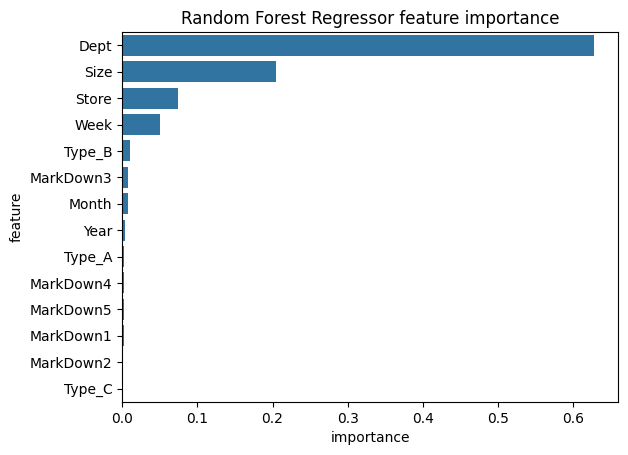

In [89]:
sns.barplot(data=model_importance_df, x='importance', y='feature')
plt.title('Random Forest Regressor feature importance')

### Observations
The variables Dept, Size, Store and Week are the most important for this model.

## Predictions on the test dataset

In [55]:
test_dataset[['MarkDown1','MarkDown2','MarkDown3','MarkDown4', 'MarkDown5']] = test_dataset[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)
test_dataset['Year'] = pd.to_datetime(test_dataset['Date']).dt.year
test_dataset['Month'] = pd.to_datetime(test_dataset['Date']).dt.month
test_dataset['Week'] = pd.to_datetime(test_dataset['Date']).dt.isocalendar().week
test_dataset = test_dataset.drop(columns=["Date", "CPI", "Fuel_Price", 'Unemployment', 'Temperature'])

test_dataset

Store  Dept  IsHoliday Type    Size  MarkDown1  MarkDown2  MarkDown3  \
0           1     1      False    A  151315    6766.44    5147.70      50.82   
1           1     1      False    A  151315   11421.32    3370.89      40.28   
2           1     1      False    A  151315    9696.28     292.10     103.78   
3           1     1       True    A  151315     883.59       4.17   74910.32   
4           1     1      False    A  151315    2460.03       0.00    3838.35   
...       ...   ...        ...  ...     ...        ...        ...        ...   
115059     45    98      False    B  118221    4842.29     975.03       3.00   
115060     45    98      False    B  118221    9090.48    2268.58     582.74   
115061     45    98      False    B  118221    3789.94    1827.31      85.72   
115062     45    98      False    B  118221    2961.49    1047.07     204.19   
115063     45    98      False    B  118221     212.02     851.73       2.06   

        MarkDown4  MarkDown5  Year  Month  Week  
0         3639.90    2737.42  2012     11    44  
1         4646.79    6154.16  2012     11    45  
2         1133.15    6612.69  2012     11    46  
3          209.91     303.32  2012     11    47  
4          150.57    6966.34  2012     11    48  
...           ...        ...   ...    ...   ...  
115059    2449.97    3169.69  2013      6    26  
115060    5797.47    1514.93  2013      7    27  
115061     744.84    2150.36  2013      7    28  
115062     363.00    1059.46  2013      7    29  
115063      10.88    1864.57  2013      7    30  

[115064 rows x 13 columns]

In [90]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         115064 non-null  int64         
 1   Dept          115064 non-null  int64         
 2   Date          115064 non-null  datetime64[ns]
 3   IsHoliday     115064 non-null  bool          
 4   Type          115064 non-null  object        
 5   Size          115064 non-null  int64         
 6   Temperature   115064 non-null  float64       
 7   Fuel_Price    115064 non-null  float64       
 8   MarkDown1     114915 non-null  float64       
 9   MarkDown2     86437 non-null   float64       
 10  MarkDown3     105235 non-null  float64       
 11  MarkDown4     102176 non-null  float64       
 12  MarkDown5     115064 non-null  float64       
 13  CPI           76902 non-null   float64       
 14  Unemployment  76902 non-null   float64       
dtypes: bool(1), datet

In [91]:
test_dataset.describe()

Store           Dept                           Date  \
count  115064.000000  115064.000000                         115064   
mean       22.238207      44.339524  2013-03-14 14:39:41.311270144   
min         1.000000       1.000000            2012-11-02 00:00:00   
25%        11.000000      18.000000            2013-01-04 00:00:00   
50%        22.000000      37.000000            2013-03-15 00:00:00   
75%        33.000000      74.000000            2013-05-24 00:00:00   
max        45.000000      99.000000            2013-07-26 00:00:00   
std        12.809930      30.656410                            NaN   

                Size    Temperature     Fuel_Price      MarkDown1  \
count  115064.000000  115064.000000  115064.000000  114915.000000   
mean   136497.688921      53.941804       3.581546    7689.216439   
min     34875.000000      -7.290000       2.872000   -2781.450000   
25%     93638.000000      39.820000       3.431000    1966.460000   
50%    140167.000000      54.470000       3.606000    4842.290000   
75%    202505.000000      67.350000       3.766000    9439.140000   
max    219622.000000     101.950000       4.125000  103184.980000   
std     61106.926438      18.724153       0.239442   10698.760716   

          MarkDown2      MarkDown3      MarkDown4      MarkDown5  \
count  86437.000000  105235.000000  102176.000000  115064.000000   
mean    3734.051729    2403.088666    3356.219071    3922.681189   
min      -35.740000    -179.260000       0.220000    -185.170000   
25%      180.350000      15.100000     155.460000    1309.300000   
50%      742.590000      78.260000     840.940000    2390.430000   
75%     2735.670000     272.580000    3096.920000    4227.270000   
max    71074.170000  149483.310000   65344.640000  771448.100000   
std     8323.495014   13767.939313    7570.501545   19445.150745   

                CPI  Unemployment  
count  76902.000000  76902.000000  
mean     176.961347      6.868733  
min      131.236226      3.684000  
25%      138.402033      5.771000  
50%      192.304445      6.806000  
75%      223.244532      8.036000  
max      228.976456     10.199000  
std       41.239967      1.583427

In [56]:
test_dataset[numeric_cols] = imputer.transform(test_dataset[numeric_cols])
test_dataset[numeric_cols] = scaler.transform(test_dataset[numeric_cols])
test_dataset[encoded_cols] = encoder.transform(test_dataset[categorical_cols])

test_inputs = test_dataset[numeric_cols + encoded_cols]

test_preds = model.predict(test_inputs)

## Submitting the predicted data into the submission.csv file

In [57]:
submission_df['Weekly_Sales'] = test_preds
submission_df.to_csv('submission.csv', index=False)

In [58]:
from IPython.display import FileLink
FileLink('submission.csv') 

c:\Users\UNITECH\Desktop\Programming\Python\submission.csv

### Results of the prediction

In [59]:
results_df = pd.read_csv('submission.csv')
results_df

Id  Weekly_Sales
0         1_1_2012-11-02  26333.092500
1         1_1_2012-11-09  18823.020000
2         1_1_2012-11-16  18511.041875
3         1_1_2012-11-23  19394.146875
4         1_1_2012-11-30  19918.930625
...                  ...           ...
115059  45_98_2013-06-28    682.099375
115060  45_98_2013-07-05    733.286875
115061  45_98_2013-07-12    716.767500
115062  45_98_2013-07-19    729.153750
115063  45_98_2013-07-26    744.611250

[115064 rows x 2 columns]

In [60]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Id            115064 non-null  object 
 1   Weekly_Sales  115064 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.8+ MB


In [61]:
results_df.describe()

Weekly_Sales
count  115064.000000
mean    16616.873222
std     23671.551093
min      -551.950000
25%      2218.920781
50%      7849.875000
75%     21087.104531
max    515238.256250

## Predictions on single inputs

In [62]:
def predict_input(model, single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols].values)
    return model.predict(input_df[numeric_cols + encoded_cols])[0]

In [96]:
sample_input = {'Store':45, 'Dept':23, 'IsHoliday':True, 'Type':'A', 'Size':125833, 'MarkDown1':2.5, 'MarkDown2':0.02, 
                'MarkDown3':55952.99, 'MarkDown4':14.64, 'MarkDown5':310.72, 'Year':2013, 'Month':11, 'Week':47}

predicted_price = predict_input(model, sample_input)
print('The predicted weekly sales is ${}'.format(predicted_price))

The predicted weekly sales is $26530.504374999997


c:\Users\UNITECH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
